<a href="https://colab.research.google.com/github/Israelchguevara/SmartHouse/blob/main/Tarea_Final_MD_Israel_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA EVALUACIÓN FINAL - PARTE I #

Esta practica final tiene por objetivo evaluar los conocimientos que se han adquirido por parte del alumno a lo largo de los distintos temas del módulo. La práctica se divide en 2 partes: ésta primera parte que permite evaluar los temas de Data Understanding, Data Preparation, Regresión Lineal, Regresión Logística, Selección de variables, Análisis de componentes principales (PCA), Análisis Factorial y técnicas de clustering.

Supone por tanto un 75% de la calificación correspondiente a la Prática de Evaluación Final completa incluyendo ambas partes. Por tanto la parte 2, incluirá ejercicios de evaluación de los temas de series temporales y por ello supondrá un 25%.

En conjunto, toda la Práctica de Evaluación Final (ambas partes) tiene un peso del 60% de la nota final (el test de evaluación sería el 40% restante).

Es importante tener presente que, dado que se va a utilizar el mismo conjunto de datos para evaluar distintos temas del módulo, se perseguirán objetivos distintos en distintas partes de esta práctica parte I. Por ejemplo, para el modelo de regresión lineal, se tomará como variable objetivo ***Salary***, mientras que para la regresión logística, la variable objetivo será ***Gender***. Se deberá tener presente esto especialmente a la hora de llevar a cabo toda la fase de entendimiento y preparación de los datos ya que habrá transformaciones y analisis que serán comunes para ambos modelos y otras que serán específicas de cada modelo. en este sentido, el alumno deberá organizarse como mejor considere para llevar a cabo la práctica siguiendo el guión establecido pero con cierta flexibilidad para incluir todo aquello que considere oportuno en el momento que considere oportuno.

Por la misma razón, la parte de clustering no tiene variable objetivo como tal pero el analisis exploratorio y la preparación de los datos puede llevar a que haya particularidades para sus ejercicios además de las comunes.

Comenzando con esta primera parte de la práctica, en el primer bloque de código, conviene cargar las librerías que se van a utilizar a lo largo del notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install relativeImp #

In [ ]:
# Importar librerias necesarias para realizar el analísis

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import  stats,boxcox, shapiro, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
from relativeImp import relativeImp
from itertools import combinations


En el siguiente paso vamos a proceder a cargar el fichero Salary_MD.csv que servirá como conjunto de datos para llevar a cabo toda la evaluación de esta parte I. Se trata de un fichero en el que cada registro es un empleado y sobre él, cada campo aporta información laboral y de formación.

In [ ]:
# Cargar el fichero de datos en un DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_MD.csv')

En los siguientes bloques de código el alumno debe programar las sentencias de código que considere oportunas para hacerse una idea general de los datos y de las variables. Visualización de datos, gráficos, etc. Los bloques son orientativos, el alumno puede añadir cuantos considere y codificarlos según su criterio.

In [ ]:
# Mostrar los 10 primeros registros
pd.set_option('display.max_columns', None)
data.dropna(thresh=data.shape[1] - 1).head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1.0,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2.0,Data Analyst,3.0,65000,USA,NaN,0
2,45,Male,3.0,Manager,15.0,150000,Canada,White,1
3,36,Female,1.0,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2.0,Director,20.0,200000,USA,Asian,0
5,29,Male,1.0,Marketing Analyst,2.0,55000,USA,Hispanic,0
6,42,Female,2.0,Product Manager,12.0,120000,USA,Asian,0
7,31,Male,1.0,Sales Manager,4.0,80000,China,Korean,0
8,26,Female,1.0,Marketing Coordinator,1.0,45000,China,Chinese,0
9,38,Male,3.0,Scientist,10.0,110000,Australia,Australian,1


In [ ]:
# Describir el DataFrame

A continuación procederemos a mostrar e identificar las variables del dataset

*   **Age:** Edad de la persona del estudio
*   **Gender:** Género de la persona másculino o femenino
*   **Education Level:** Nivel de educación adquirido
*   **Job Title:** Titulo profesional o grado académico obtenido
*   **Years of Experience:** Años de experiencia en el sector  
*  **Salary:** Salario anual
*   **Country:** País de origen
*   **Race:**  Origen racial
*   **Senior:** Profesionales que cuentas con más de 10 años de experiencia

In [ ]:
# Mostrar las columnas y tipos de datos
data.info() # Información general de las columnas, tipos de datos y no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6613 non-null   object 
 2   Education Level      6661 non-null   float64
 3   Job Title            6644 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6660 non-null   object 
 7   Race                 6521 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 470.1+ KB


En base a la información generada podemos determinar que tenemos un volumen de 6684 registros los cuales engloban un total de 9 variables (incluyendo la variable objetivo **Salary**). En cuanto a los tipos de datos podemos decir que tenemos más variables de caracter númerico:

*   Age
*   Education Level
*   Years of Experience
*   Salary
*   Senior

Mientras que en menor número tenemos las de caracter categorico:

*   Gender
*   Job Title
*   Country
*   Race















Podemos observar que nuestro conjunto de datos es pequeño por lo cual no tendremos mayor dificultad en analizar los datos.adicional a esto

In [ ]:
# Elimnar columnas irelevantes persistiendo el cambio en el dataframe original

data.drop(columns=['Senior'], inplace=True)

In [ ]:
# Estadísticas descriptivas (media, std, min, max, etc.)
print(data.describe())

               Age  Education Level  Years of Experience        Salary
count  6684.000000      6661.000000          6684.000000  6.684000e+03
mean     33.147816         1.623480             8.161655  1.164338e+05
std       8.619754         0.880016             7.356860  6.738536e+04
min       0.000000         0.000000             0.000000  0.000000e+00
25%      28.000000         1.000000             3.000000  7.000000e+04
50%      32.000000         1.000000             7.000000  1.150000e+05
75%      38.000000         2.000000            12.000000  1.600000e+05
max     110.000000         3.000000           200.000000  2.159320e+06


Variables numéricas:  ['Age' 'Education Level' 'Years of Experience' 'Salary']


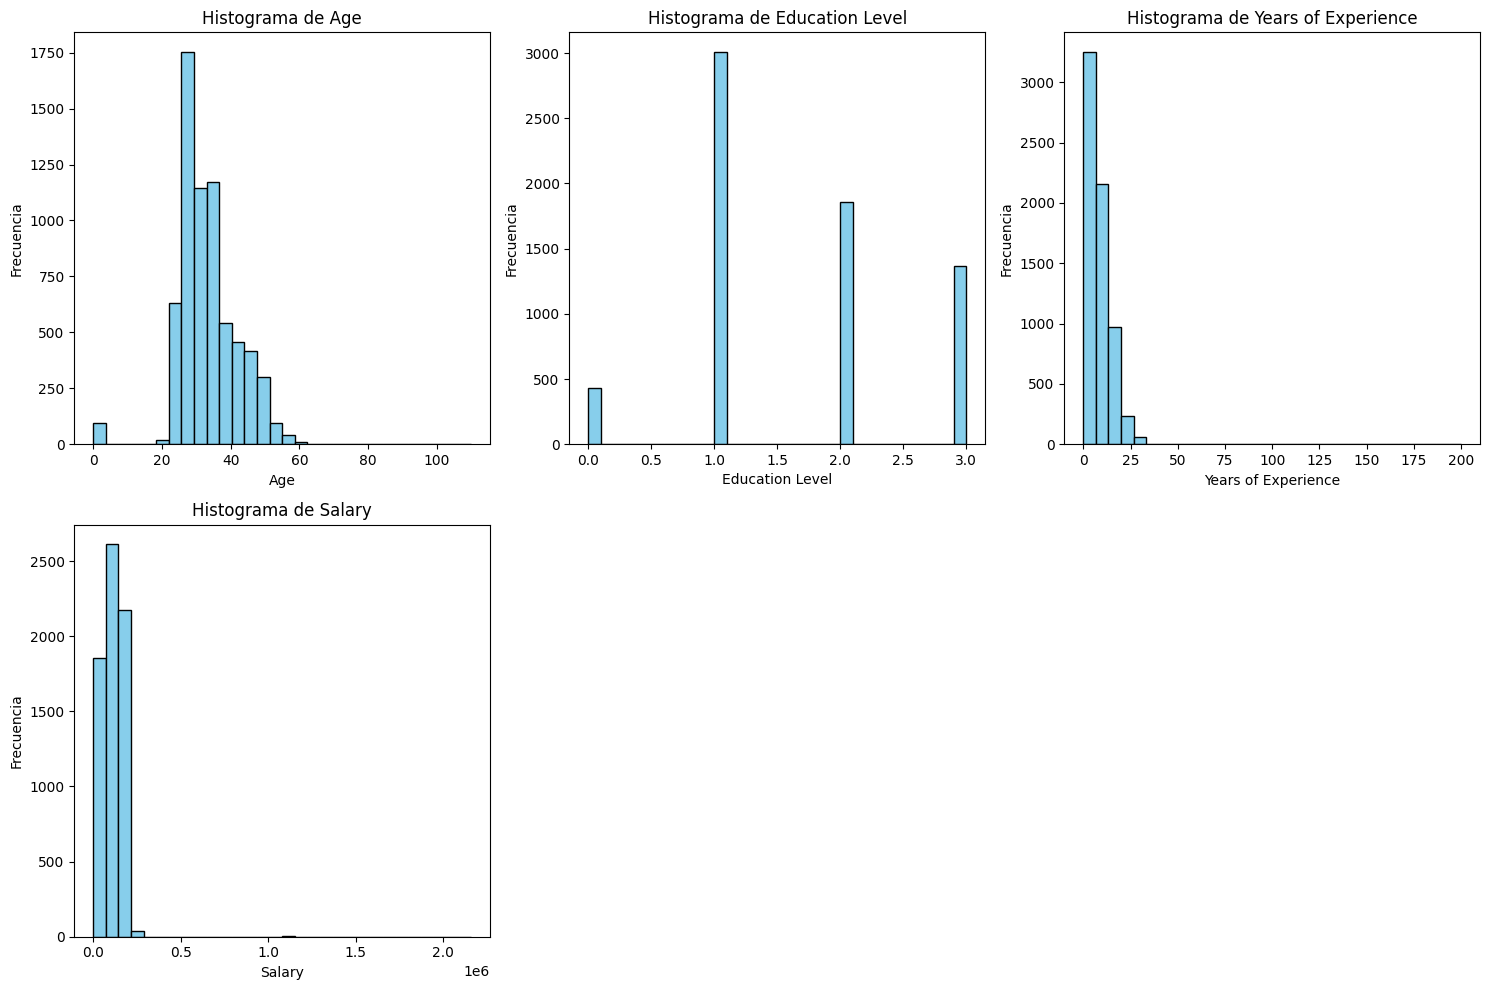

In [ ]:
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Variables numéricas: ", numeric_columns.values)

# Crear una figura con subplots
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
# Graficar el histograma
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

 # Eliminar ejes sobrantes si hay menos de 3 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Percentil 95 de Age: 49.0
Percentil 95 de Education Level: 3.0
Percentil 95 de Years of Experience: 19.0
Percentil 95 de Salary: 195000.0


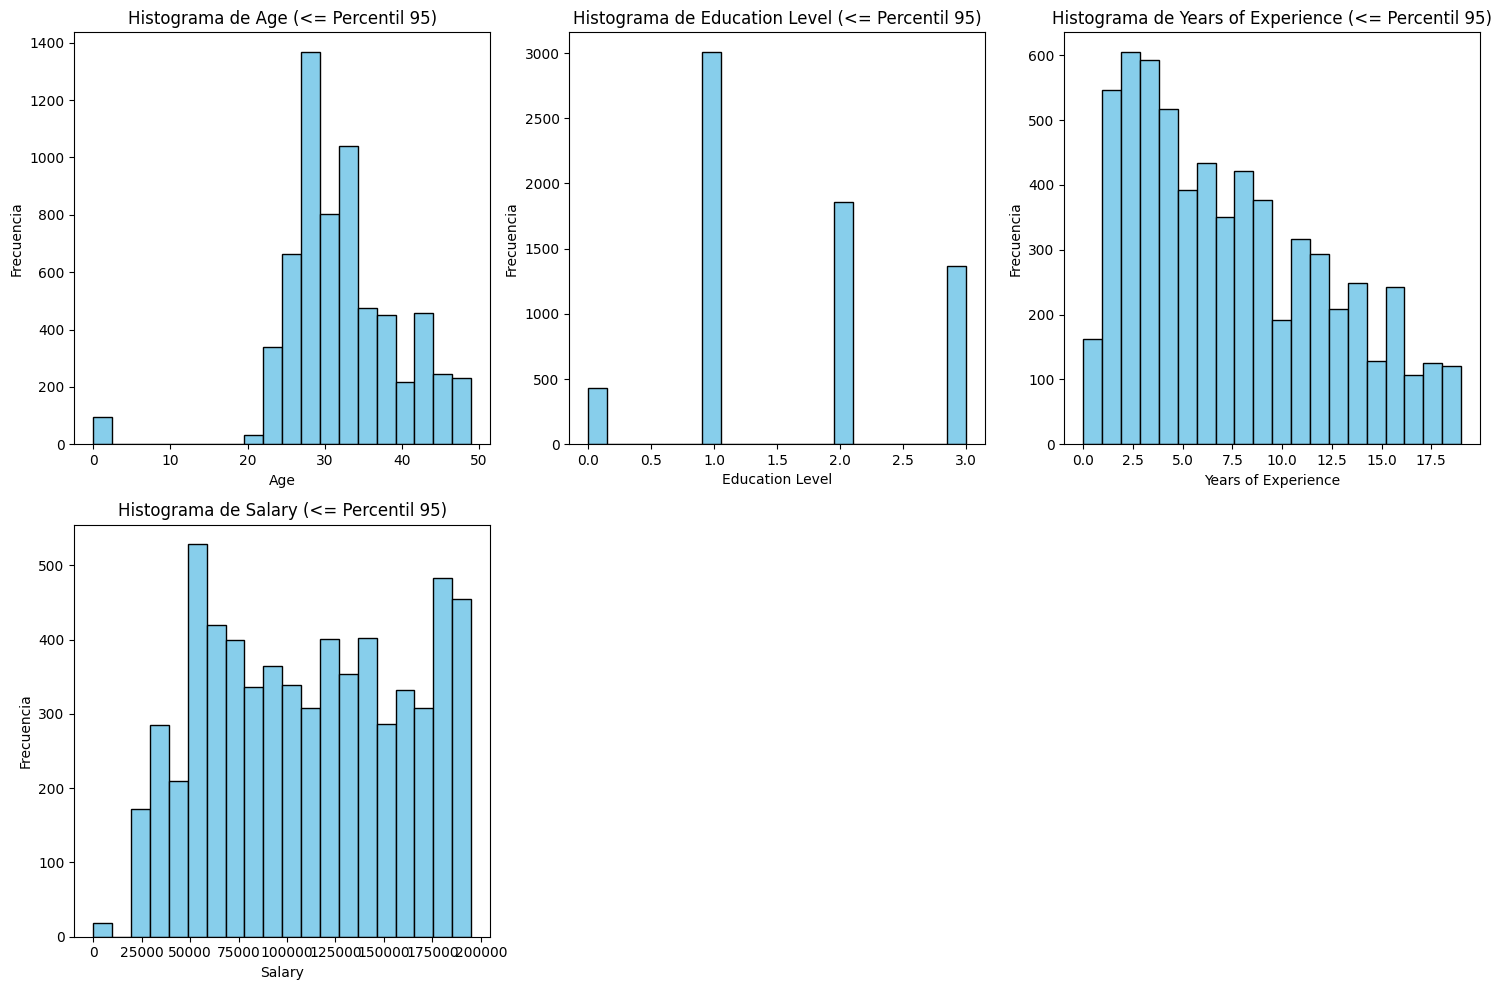

In [ ]:
# Crear una función para graficar histogramas hasta el percentil X
def plot_histograms_percentile(df, x):

    # Crear una figura con subplots
    num_vars = len(numeric_columns)
    fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        # Calcular el percentil 95 de la variable
        percent = np.percentile(df[col].dropna(), x)
        print(f"Percentil 95 de {col}: {percent}")

        # Filtrar los valores hasta el percentil 95
        filtered_data = df[col][df[col] <= percent]

        # Graficar el histograma
        axes[i].hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histograma de {col} (<= Percentil 95)')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    # Eliminar ejes sobrantes si hay menos de 3 variables
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_histograms_percentile(data,95)

### Pregunta 1 ###
De este primer vistazo general, ¿qué conclusiones sacamos acerca de las variables ***Salary*** y ***Years of Experience***? ¿Qué características tiene la variable ***Job Title***?

***Respuesta:***

Podemos determinar de la variable **Salary** posee valores en cero como valores minimos quizá se deba a un error en el ingreso de la información o a su vez que se esta considerando a personas que se encuentran desempleadas, adicional observamos que en promedio el salario de nuestro conjunto de datos es de `$`116.433.83, obteniendo un valor máximo de `$`2.159.320.00 lo cual nos refleja un valor fuera de atípico(outlier).

Mientras que para  la variable **Years of Experiance** de igual manera presentan como valores minimos la edad de 0 esto podria ser considerado como ninguna experiencia en el sector, también podemos mencionar que los años de experiencia en promedio son de 8.16 años, teniendo en cuenta que existe un valor maximo de 200 años lo cual si es un valor fuera de serie que nos indica un error en nuestros datos.

Por ultimo la variable **Job Title** podemos decir que es una variable de caracter categórico la cual se encuentra incompleta con 40 registros vacios, por lo tanto habrá que decidir que hacer con estos datos.

Pasamos ahora a profundizar aún más en las variables a través de las relaciones entre ellas. El alumno debe analizar correlaciones y las relaciones entre categóricas o categoricas y númericas. teniendo en cuenta como valor máximo  $2,159.320.00 lo cúal nos resulta un valor atípico(outlier) dentro de nuestro conjunto de datos

In [ ]:
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Variables numéricas: ", numeric_columns.values)

Variables numéricas:  ['Age' 'Education Level' 'Years of Experience' 'Salary']


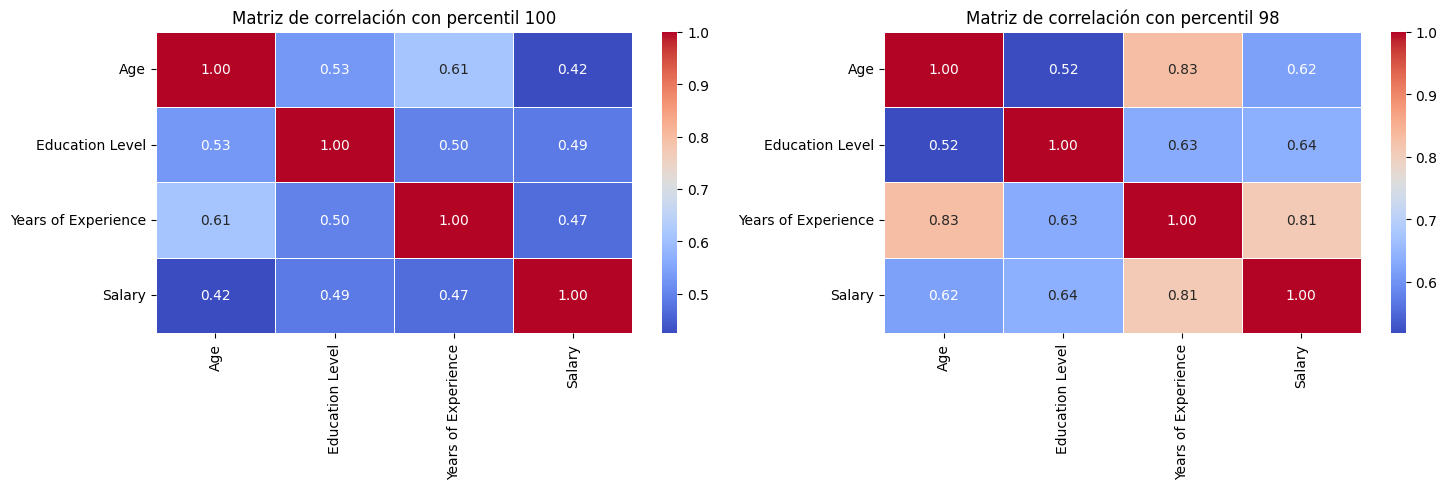

In [ ]:
# Calcular la matriz de correlación

def corr_matrix_percent(df, x):
   # quitamos del dataframe todos los registros con valores nulos (NaN) en alguna de las columnas numericas
    filtered_data = df[numeric_columns].dropna()

    for i, col in enumerate(numeric_columns):
        # Calcular el percentil x de la variable
        percent = np.percentile(filtered_data[col], x)

        # Filtrar los valores hasta el percentil x
        filtered_data = filtered_data[filtered_data[col] <= percent]

    # Correlación entre variables numéricas
    correlation_matrix = filtered_data.corr()
    return correlation_matrix

percentiles = [100, 98]

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, percentil in enumerate(percentiles):
    corr_matrix = corr_matrix_percent(data, percentil)

    # Graficar matriz on the corresponding subplot
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'Matriz de correlación con percentil {percentil}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Podemos observar que en la primera matriz existe correlación entre las 3 variables pero no existe una fuerte relación debido a que la misma toma en cuenta valores outliers, en cambio al reducir al percentil 98 omitiendo los outliers la  matriz nos enseña que existe una mayor correlación entre las variables, especialmente en el caso de la variable objetivo **Salary** con las otras dos.

**Years of Experience** tiene una relación positiva de 0.81 lo cual es suficientemente significativa y nos indica que a medida que aumenta la edad tiende a aumentar los años de experiencia lo cual por norma general es así.

La relación de **Age** nos indica que existe una relación positiva de 0.61 aunque no  es suficientemente fuerte nos muestra que la edad tiene una ligera influencia en el salario esto se debe a que al haber amplias profesiones podemos decir que muchas de ellas lucran más que otras independientemente de la edad de los profesionales.




In [ ]:
# Identificar las variables categóricas
category_columns = data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas: ", category_columns.values)

# Calcular la cardinalidad de cada columna
cardinalities = data[category_columns].nunique()
print('\n',cardinalities.sort_values(ascending=False))

# Varables categóricas

categorical_cols= ['Job Title', 'Country', 'Race', 'Gender']

Variables categóricas:  ['Gender' 'Job Title' 'Country' 'Race']

 Job Title    129
Race          10
Country        5
Gender         2
dtype: int64


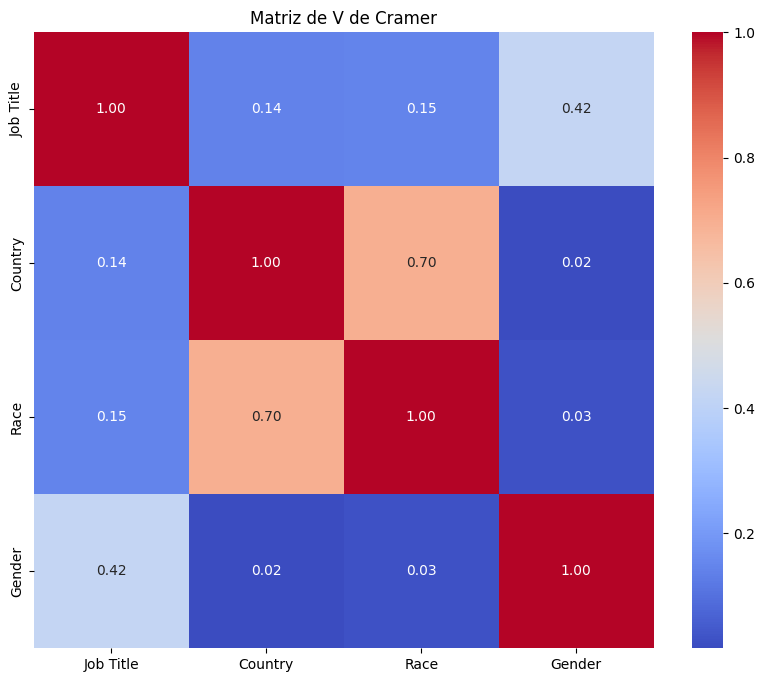

In [ ]:
# Calcular la matriz de coeficientes V de Cramér

def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Número total de observaciones
    k = min(confusion_matrix.shape)  # Número de categorías en la variable
    return np.sqrt(chi2 / (n * (k - 1)))

# Crear una matriz vacía para almacenar los valores de V de Cramer
matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calcular V de Cramer para cada par de variables categóricas
for var1, var2 in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value
# Llenar la diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir a tipo float
matrix = matrix.astype(float)

# Visualizar la matriz como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de V de Cramer")
plt.show()


### Pregunta 2 ###
¿Cualés son las relaciones más destacadas entre variables? Describe estas relaciones e interpretalas brevemente.

***Respuesta:***

Podemos observar que las relaciones más destacadas son **Country** y **Race** con un coeficiente de 0.70 mostrando una relación fuerte entre ambas, podriamos suponer  bajo este resultado que en ciertos países se concentran más ciertas razas lo cual es lo más habitual.

Adicional a esto la siguiente relación más destacada es **Gender** y **Job Title** con un coeficiente de 0.42 el cual nos muestra una relación moderada entre ambas y nos indica que existe una tendencia en ciertos generos a ocupar ciertos puestos de trabajo esto podría responder a que aún hoy por hoy sigue existiendo una brecha de género para algunos puestos de trabajo en los cuales se dá más prioridad a contratar más hombres que a mujeres.

Nos centramos ahora en la calidad del dato. Arrancamos con el analisis de valores nulos donde el alumno debe programar código para determinar las variables que tienen valores nulos, el número de registros de cada variable con valores nulos, etc.

In [ ]:
# Tabla de porcentaje de registros con Missing Values por cada variable

# Análisis de Missing Values
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


,Missing Values,Percentage
Race,163,2.438659
Gender,71,1.062238
Job Title,40,0.598444
Country,24,0.359066
Education Level,23,0.344105
Age,0,0.000000
Salary,0,0.000000
Years of Experience,0,0.000000


In [ ]:
# Cuenta de valores nulos por registro

null_counts = data.isnull().sum(axis=1)

# Crear la tabla resumen
summary = null_counts.value_counts().reset_index()
summary.columns = ['num_nulls', 'count']
summary = summary.sort_values('num_nulls').reset_index(drop=True)


# Mostrar resultado
summary

,num_nulls,count
0,0,6461
1,1,161
2,2,32
3,3,24
4,4,6


### Pregunta 3 ###
¿Éxiste algún tipo de relación entre los valores nulos de la variable ***Gender*** y ***Salary***? Los nulos de ***Gender***, para esta práctica, hay que llevar a cabo algún tipo de imputación para no perder esos registros. ¿Cómo se realizará está imputación y cuales son las razones que llevan a hacerlo así?

***Respuesta:***

No existe relación entre los valores nulos de la variable **Gender** y **Salary** esto debido a que en el cuadro de valores nulos podemos observar que la variable **Salary** no tiene valores nulos.

Por otro lado los valores nulos de **Gender** es necesario llevar a cabo la imputación de valores para evitar perder estos registros debido a que tambien conlleva a la perdida de información y de resultados a la hora de analizar el conjunto de datos en su totalidad.

El metodo por el cual podemos realizar la imputación de valores es mediante la imputación por moda, esto debido a que **Gender** es una variable categórica ( Male, Female) esto reemplaza el valor faltante con la categoria más frecuente.

Antes de pasar a ejecutar las acciones que hayamos decidido realizar para corregir los problemas de valores nulos, analizamos los valores atípicos de las variables. Utilizaremos 2 métodos para identificarlos: Z-Score y rango intercuartil (IQR)

Umbral inferior: -1.3286208434928923
Umbral superior: 67.62425220196087


<ipython-input-18-e74337c49325>:6: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(data[column], nan_policy='omit'))


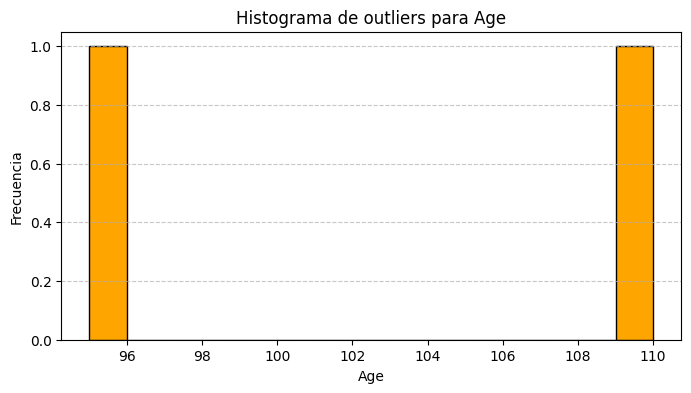

<ipython-input-18-e74337c49325>:6: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(data[column], nan_policy='omit'))
<ipython-input-18-e74337c49325>:6: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(data[column], nan_policy='omit'))


Umbral inferior: -1.8963185017485558
Umbral superior: 5.143278417677095
Umbral inferior: -21.263582787660482
Umbral superior: 37.586892183231996


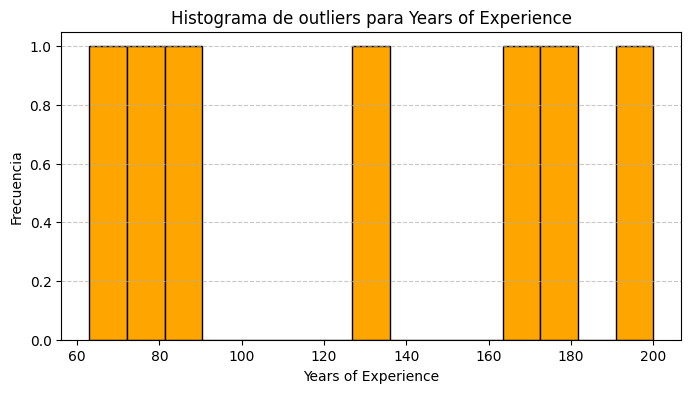

<ipython-input-18-e74337c49325>:6: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(data[column], nan_policy='omit'))


Umbral inferior: -153087.4252098321
Umbral superior: 385955.08768739045


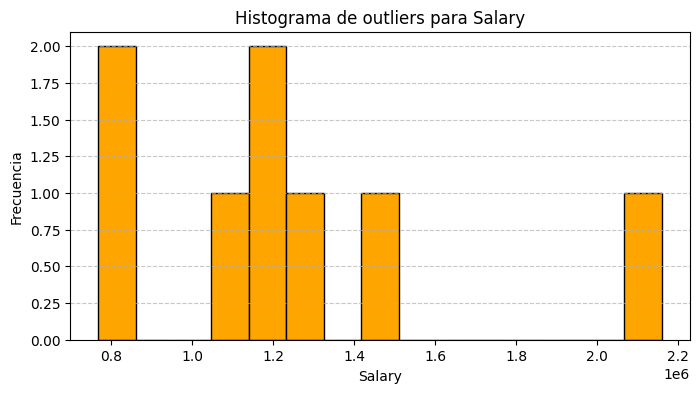


Outliers identificados:
              Variable Outliers
0                  Age        2
1  Years of Experience        7
2               Salary        8


In [ ]:
# Identificación de outliers (Z-score con umbral de 4)

outliers = pd.DataFrame(columns=['Variable', 'Outliers'])
for i, column in enumerate(numeric_columns):
    # Replace 'df' with 'data' to use the correct DataFrame
    z_scores = np.abs(stats.zscore(data[column], nan_policy='omit'))
    outlier_indices = np.where(z_scores > 4)[0]

# Calculamos la media y la desviación estándar
    mu = np.mean(data[column])
    sigma = np.std(data[column])

# Calculamos los valores correspondientes a un Z-score de 4 y -4
    upper_bound = 4 * sigma + mu
    lower_bound = -4 * sigma + mu
    print(f"Umbral inferior: {lower_bound}")
    print(f"Umbral superior: {upper_bound}")

    if len(outlier_indices) > 0:
        outliers = pd.concat([outliers, pd.DataFrame({'Variable': [column], 'Outliers': [len(outlier_indices)]})], ignore_index=True)
 # Pintar histograma de los valores outliers
        plt.figure(figsize=(8, 4))
        plt.hist(data[column].iloc[outlier_indices], bins=15, color='orange', edgecolor='black')
        plt.title(f'Histograma de outliers para {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

print("\nOutliers identificados:")
print(outliers)

Q1 (25 percentil): 28.0
Q3 (75 percentil): 38.0
Rango IQR: 10.0
Umbral inferior : -2.0
Umbral superior : 68.0


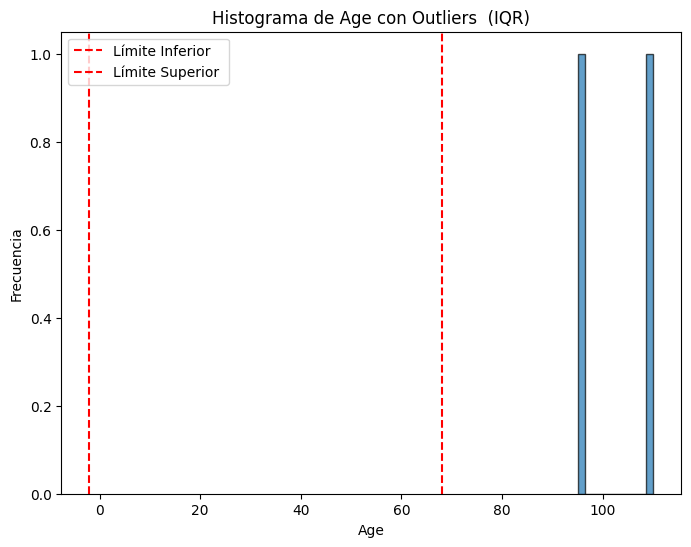

Q1 (25 percentil): 3.0
Q3 (75 percentil): 12.0
Rango IQR: 9.0
Umbral inferior : -24.0
Umbral superior : 39.0


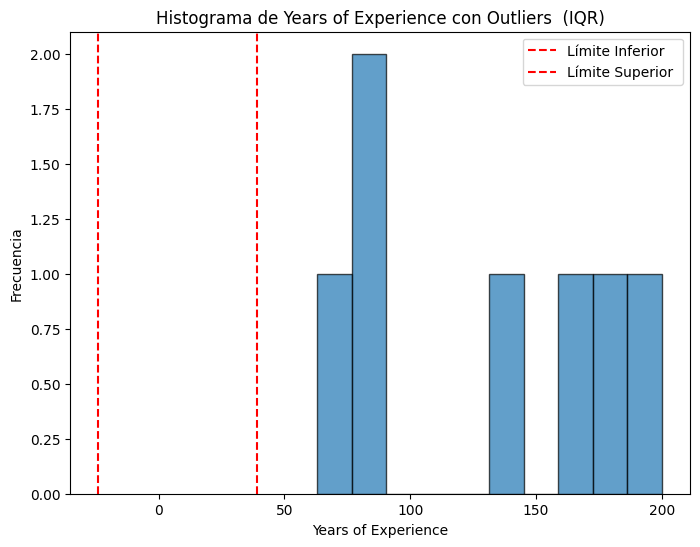

Q1 (25 percentil): 70000.0
Q3 (75 percentil): 160000.0
Rango IQR: 90000.0
Umbral inferior : -200000.0
Umbral superior : 430000.0


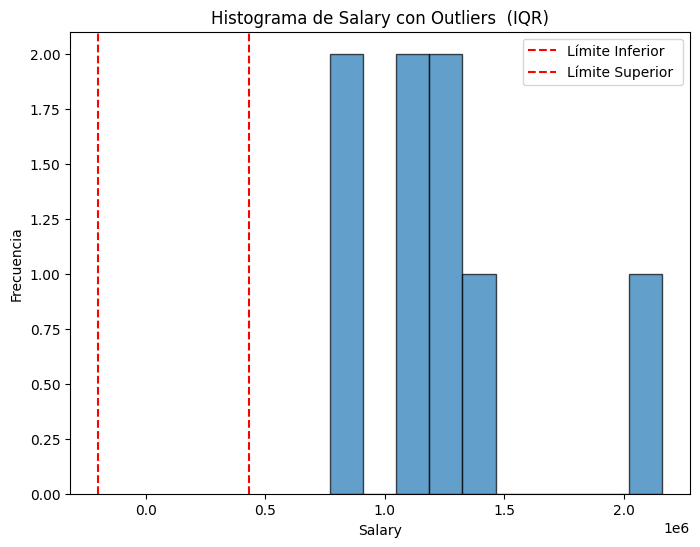


Outliers  identificados mediante IQR:
              Variable Outliers
0                  Age        2
1  Years of Experience        7
2               Salary        8


In [ ]:
# Identificación de outliers mediante el rango IQR (umbral más alto)
outliers = pd.DataFrame(columns=['Variable', 'Outliers'])
for i, column in enumerate(numeric_columns):
    df_col_dropna = data[column].dropna()
    Q1 = df_col_dropna.quantile(0.25)  # Primer cuartil
    Q3 = df_col_dropna.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Límites para outliers  (umbral 3 * IQR)
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Identificar los outliers
    outliers_values = df_col_dropna[(df_col_dropna < lower_bound) | (df_col_dropna > upper_bound)]

    if len(outliers_values) > 0:
        outliers = pd.concat([outliers, pd.DataFrame({'Variable': [column], 'Outliers': [len(outliers_values)]})], ignore_index=True)

        print(f"Q1 (25 percentil): {Q1}")
        print(f"Q3 (75 percentil): {Q3}")
        print(f"Rango IQR: {IQR}")
        print(f"Umbral inferior : {lower_bound}")
        print(f"Umbral superior : {upper_bound}")

        # Graficar los histogramas de los outliers
        plt.figure(figsize=(8, 6))
        plt.hist(outliers_values, bins=10, edgecolor='black', alpha=0.7)
        plt.axvline(lower_bound, color='r', linestyle='--', label='Límite Inferior ')
        plt.axvline(upper_bound, color='r', linestyle='--', label='Límite Superior ')
        plt.title(f"Histograma de {column} con Outliers  (IQR)")
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()


# Mostrar los resultados de los outliers
print("\nOutliers  identificados mediante IQR:")
print(outliers)

### Pregunta 4 ###
¿Qué variables tienen outliers? en ocasiones, dependiendo de los outliers de una variable, es más apropiado identificarlos mediante un método u otro. En tu opinión y en base al estudio de los outliers de cada variable numérica, ¿cuál es el más apropiado para cada una y por qué?

***Respuesta:***

Las variables que presentan outliers son **Age** con 2 valores, seguidos de **Years of Experience** con 7 valores por último **Salary** con 8 valores outliers, en mi opinión para la identificación de valores outliers recomendaria en este caso el método por rango intercuartil ya que nuestros datos no siguen una distribución normal y presentamos datos asimetricos, adicional a esto este metodo proporciona limites concretos (superior e inferior) basados en percentiles lo que hace más facil su interpretación. Podríamos utlizar el metodo zscore si tuvieramos una distribución normal y si de igual manera los outliers no fueran muy extremos ya que este metodo es más sensible para detectarlos.

Ahora procedemos a trabajar los datos seleccionando registros, variables y solventando los problemas de outliers y valores nulos para dejar preparado el conjunto de datos para la fase de modelado posterior. En este sentido, las siguientes líneas de código, deben programarse para realizar estas transformaciones.

In [ ]:
# Seleccion/Eliminación de registros y variables

# Elimnar columnas irelevantes persistiendo el cambio en el dataframe original
data.drop(columns=['Country','Race'], inplace=True)

# Comprobamos las variables que quedan y sus tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6613 non-null   object 
 2   Education Level      6661 non-null   float64
 3   Job Title            6644 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 313.4+ KB


In [ ]:
# Seleccion/Eliminación de registros y variables

data.dropna(thresh=data.shape[1] - 5, inplace=True)

# Eliminar registros donde ambas variables sean nulas
data = data[~(data[['Gender','Job Title','Education Level']].isnull().sum(axis=1) == 2)]


In [ ]:
# Imputación o acciones para tratar valores nulos

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Job Title'].fillna(data['Job Title'].mode()[0], inplace=True)
data['Education Level'].fillna(data['Education Level'].mode(), inplace=True)
data['Years of Experience'].fillna(data['Years of Experience'].mode(), inplace=True)
data['Age'] = data['Age'].replace(0, data['Age'].median())
data['Salary'] = data['Salary'].replace(0, data['Salary'].median())

<ipython-input-22-176acd11e1b4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
<ipython-input-22-176acd11e1b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
<ipython-input-22-176acd11e1b4>:4: FutureWarning: A value i

In [ ]:
# Comprobamos los nulos que hemos eliminado
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


,Missing Values,Percentage
Education Level,12,0.180234
Age,0,0.000000
Gender,0,0.000000
Job Title,0,0.000000
Years of Experience,0,0.000000
Salary,0,0.000000


In [ ]:
# Imputación o transformación de valores atípicos

# Calcular los cuartiles y el IQR para Age y Salary
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_salary = data['Salary'].quantile(0.25)
Q3_salary = data['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

Q1_Years_of_Experience = data['Years of Experience'].quantile(0.25)
Q3_Years_of_Experience = data['Years of Experience'].quantile(0.75)
IQR_Years_of_Experience = Q3_Years_of_Experience - Q1_Years_of_Experience

Q1_Education_Level = data['Education Level'].quantile(0.25)
Q3_Education_Level = data['Education Level'].quantile(0.75)
IQR_Education_Level = Q3_Education_Level - Q1_Education_Level

# Definir los límites inferior y superior para identificar outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

lower_bound_Years_of_Experience = Q1_Years_of_Experience - 1.5 * IQR_Years_of_Experience
upper_bound_Years_of_Experience = Q3_Years_of_Experience + 1.5 * IQR_Years_of_Experience

lower_bound_Education_Level = Q1_Education_Level - 1.5 * IQR_Education_Level
upper_bound_Education_Level = Q3_Education_Level + 1.5 * IQR_Education_Level

# Filtrar el DataFrame para eliminar los outliers

data = data[(data['Age'] >= lower_bound_age) & (data['Age'] <= upper_bound_age) &
            (data['Salary'] >= lower_bound_salary) & (data['Salary'] <= upper_bound_salary) &
            (data['Years of Experience'] >= lower_bound_Years_of_Experience) & (data['Years of Experience'] <= upper_bound_Years_of_Experience) &
            (data['Education Level'] >= lower_bound_Education_Level) & (data['Education Level'] <= upper_bound_Education_Level)]

In [ ]:
def winsorize_zscore(series, threshold):
    # Calcular la media y desviación estándar y z-score
    mean = series.mean()
    std_dev = series.std()
    z_scores = (series - mean) / std_dev

    # Definir los umbrales
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev

    # Aplicar winsorización
    series_winsorized = series.copy()
    series_winsorized = np.where(series < lower_bound, lower_bound, series_winsorized)
    series_winsorized = np.where(series > upper_bound, upper_bound, series_winsorized)

    return pd.Series(series_winsorized, index=series.index)

data['Age'] = winsorize_zscore(data['Age'], 4)
data['Years of Experience'] = winsorize_zscore(data['Years of Experience'], 4)


<ipython-input-25-8be3dacb4cbf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = winsorize_zscore(data['Age'], 4)
<ipython-input-25-8be3dacb4cbf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Years of Experience'] = winsorize_zscore(data['Years of Experience'], 4)


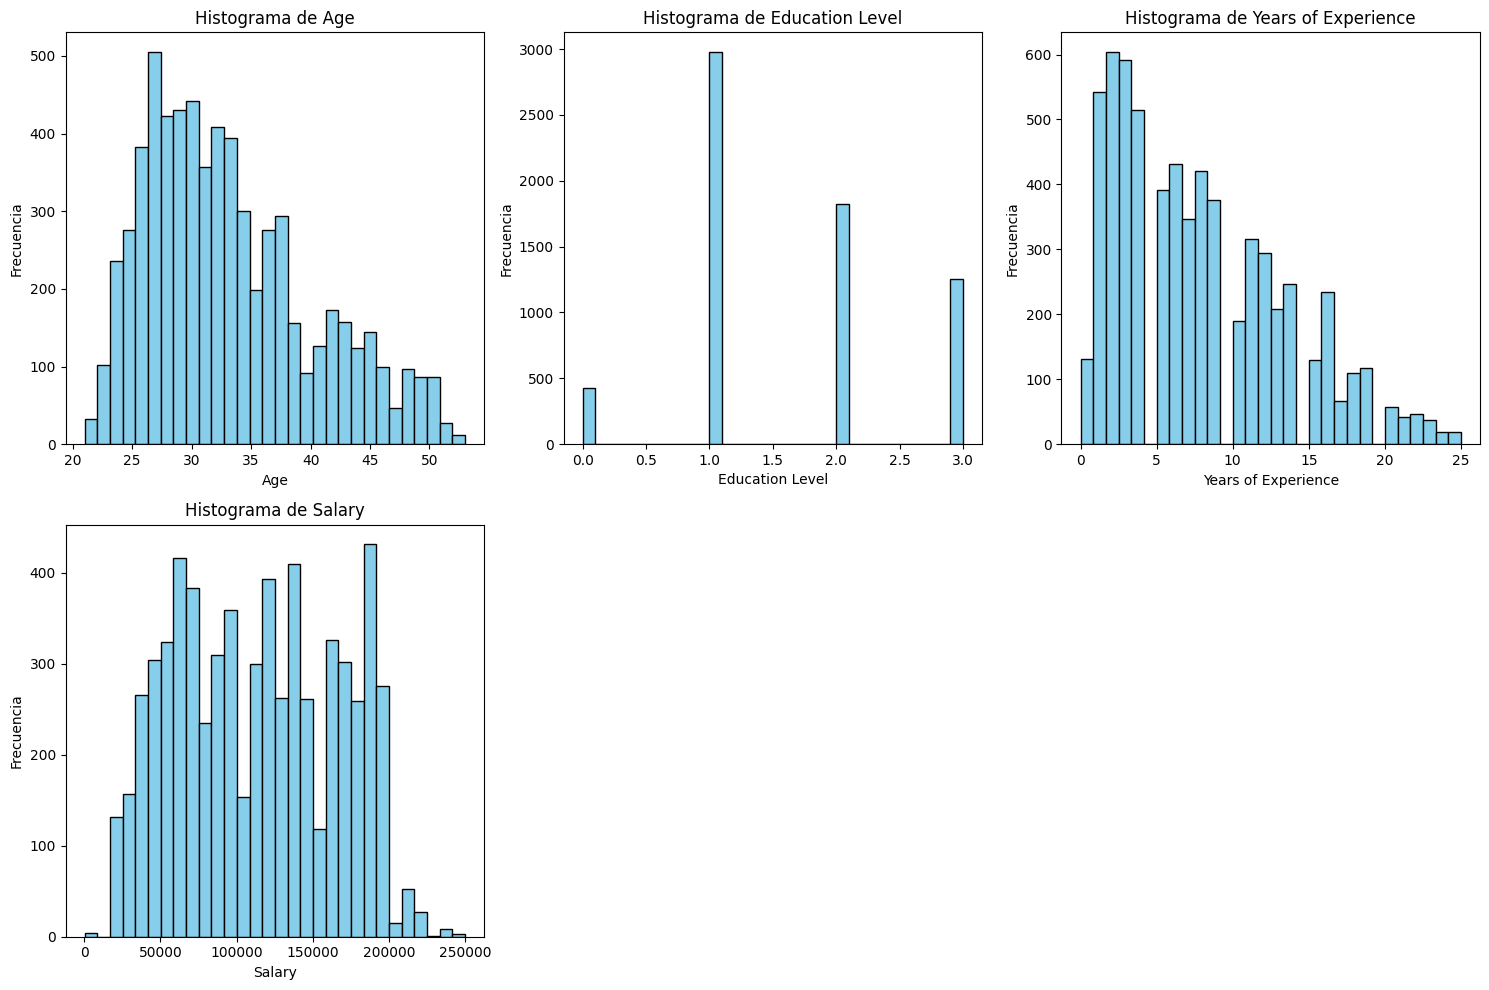

In [ ]:
# Crear una figura con subplots
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Graficar el histograma
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes sobrantes si hay menos de 3 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Pregunta 5 ###
¿cómo han sido tratados los valores átipicos de la variable ***Salary*** y por qué se ha tomado esta decisión?


***Respuesta:***

Los valores atípicos de **Salary** han sido tratados mediante el método del Rango Intercuartilico (IQR) por medio de la eliminación de los valores que caen afuera de los limites en el rango establecido, se ha tomado esta decisión debido a que los datos no siguen una distribución normal y también a que existian valores extremos  que no tenían ninguna lógica con respecto a los demás valores.

A continuación en los siguientes bloques de código, se han de llevar a cabo ciertas transformaciones que conviene realizar sobre los datos para dejarlos depurados y preparados para la fase de modelado. En este sentido, transformaciones de variables númericas para buscar mayor relación con la variable objetivo, recategorización de variables categóricas, estandarización, homogeneización de formatos y unidades, etc.

In [ ]:
# Recategorización...

data['Years of Experience'] = data['Years of Experience'].astype(int)


In [ ]:
# Estandarización...

# Identificar las columnas numéricas
numerical_cols = data.select_dtypes(include=['number']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
# Tipos de valores..
# Identificar las columnas categóricas
categorical_cols = data.select_dtypes(include=['object', 'category']).columns


In [ ]:
# Codificación...
# Aplicar One-Hot Encoding solo a las columnas categóricas
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6485 entries, 0 to 6683
Columns: 133 entries, Age to Job Title_Web Developer
dtypes: bool(129), float64(4)
memory usage: 1.0 MB


In [ ]:
# Exportar el DataFrame a un archivo CSV en el directorio actual sin incluir la columna de índices
data.to_csv('Salary_MD.csv', index=False)


### Pregunta 6 ###
En caso de que se haya llevado a cabo algún tratamiento sobre las variables categóricas, ¿qué acciones se han tomado y sobre qué variables? En el caso de la variable ***Education Level***, ¿Se ha llevado a cabo sobre ella alguna transformación o se ha dejado tal cual?¿Por qué?

***Respuesta:***

Para el tratamiento de las variables categóricas **Gender** y **Job Title** hemos llevado a cabo un  **One-Hot Encoding**  que codifica cada categoría de una variable categórica en variables independientes, ya que solo pueden tomar como valores 1 o 0 (Valores Dummy) según  la variable categórica original.

En el caso de la variable  **Education Level** se ha llevado a cabo la transformación de float a int esto debido a que es necesario limpiar el código de valores decimales.

Procedemos ahora con el primer modelo que vamos a definir con este conjunto de datos. Se trata de un modelo de regresión lineal que tratará de predecir los valores de la variable ***Salary*** en función de las demás variables.

Hasta aquí se habrán realizado diversas transformaciones y preparaciones de los datos comunes para todos los ejercicios de esta práctica. En los siguientes bloques, añadir transformaciones específicas para este modelo de regresión lineal.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

from scipy.stats import boxcox, shapiro, stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
from relativeImp import relativeImp

pd.set_option('display.max_rows', None)

In [ ]:
# Transformaciones varias para adaptar al modelo de regresión lineal

# Convertir booleanos a numéricos
boolean_columns = data.select_dtypes(include='bool').columns
data[boolean_columns] = data[boolean_columns].astype(int)



In [ ]:
# Asegurar que los datos son numéricos
data = data.apply(pd.to_numeric, errors='coerce')

Ahora procedemos a realizar la separación del conjunto de datos en 2 conjuntos: uno con las variables predictoras y otro con la variable objetivo. También separamos en conjuntos de entrenamiento y test para poder llevar a cabo el entrenamiento del modelo y la validación en conjuntos distintos. Escoged el porcentaje de datos para entrenamiento que se considere adecuado. Por último, entrenar un modelo de regresión lineal mostrando un resumen de los parametros, coeficientes y demás información útil para valorar la bondad del modelo entrenado.

In [ ]:
# Definir la variable objetivo (y) y las predictoras (X)

X = data.drop('Salary', axis=1)
y = data['Salary']

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y ajustar el modelo
X_train = sm.add_constant(X_train)  # Agrega una columna de 1s para el intercepto

# Crear y ajustar el modelo
model = sm.OLS(y_train, X_train).fit()

# Extraer los coeficientes
coef = model.params


In [ ]:
# Mostrar el resumen detallado del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     212.5
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:34:02   Log-Likelihood:                -2745.5
No. Observations:                5188   AIC:                             5731.
Df Residuals:                    5068   BIC:                             6517.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

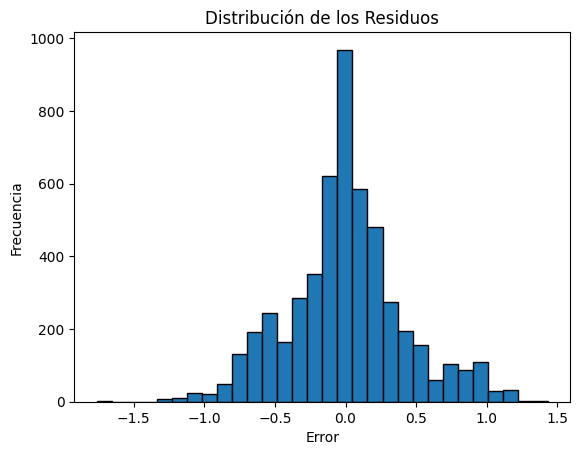

In [ ]:
# ...
plt.hist(model.resid, bins=30, edgecolor='black')
plt.title("Distribución de los Residuos")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()



In [ ]:
stat, p_value = shapiro(model.resid)
print("Shapiro-Wilk Test:")
print("Statistic:", stat)
print("P-value:", p_value)

Shapiro-Wilk Test:
Statistic: 0.9805224646801446
P-value: 4.116544437545459e-26


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5188.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# MSE en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)

print(mse_train)

0.16872384240832042


### Pregunta 7 ###
A la vista de los resultados del modelo, ¿Presenta sesgo el modelo? ¿Se cumplen las condiciones/supuestos que deben cumplirse en una regresión lineal para que el modelo sea estadisticamente válido? Detalla la respuesta haciendo interpretacion de los resultados obtenidos.

***Respuesta:***

El modelo actual tiene problemas importantes con la normalidad de los residuos y la multicolinealidad, lo que afecta su validez estadística. posee un R-squared alto (0.833) lo que sugiere que explica bien la variabilidad de los datos e indica que el modelo podria estar sesgado.
El estadístico Durbin-Watson (2.028) está muy cerca de 2, lo que sugiere que no hay autocorrelación significativa en los residuos. Esto indica que el supuesto de independencia se cumple.
El test Omnibus (Prob = 0.000) y el test Jarque-Bera (Prob = 1.28e-28) indican que los residuos no siguen una distribución normal.
El Condition Number (5.58e+19) es extremadamente alto, lo que indica un problema grave de multicolinealidad. Esto significa que algunas variables independientes están altamente correlacionadas y que las estimaciones de los coeficientes podrían no ser confiables.

A continuación, se ha de aplicar validación cruzada sobre los datos para el modelo de regresión lineal. Con esto veremos la generalización del modelo a datos no conocidos. Generar los bloques de código necesarios para llevar a cabo esta validación. La validación ha de ser en base a 2 métricas de vuestra elección sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [ ]:
# Aplicación de validación cruzada

# Agregar un término de intercepción manualmente
X_test = sm.add_constant(X_test)  # Agrega una columna de 1s para el intercepto

# Hacer predicciones con los datos de prueba
y_test_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")





Error Cuadrático Medio (MSE): 0.1782298325184312
Coeficiente de Determinación (R²): 0.8138334123353039


In [ ]:
# Definir un envoltorio para el modelo de statsmodels
class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        # Agregar la constante (intercepto)
        X = sm.add_constant(X)
        self.model = sm.OLS(y, X).fit()
        return self

    def predict(self, X):
        # Agregar la constante (intercepto)
        X = sm.add_constant(X)
        return self.model.predict(X)

# Crear el modelo envuelto
model = StatsmodelsOLS()

In [ ]:
folds = 10
# Realizar validación cruzada con R^2
scores_r2 = cross_val_score(model, X, y, cv=folds, scoring='r2')

# Estadisticas de los R^2
print("R^2 promedio:", scores_r2.mean())
print("R^2 std:", scores_r2.std())
print("R^2 por fold:", scores_r2)

R^2 promedio: 0.6207409702587953
R^2 std: 0.393654580602901
R^2 por fold: [ 0.56372522 -0.52643392  0.72845523  0.69985421  0.63827257  0.83979039
  0.88448716  0.74152088  0.84686672  0.79087124]


In [ ]:
# Validación cruzada con mse como métrica
scores_mse = cross_val_score(model, X, y, cv=folds, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Estadisticas de los mse
print("mse promedio:", scores_mse.mean())
print("mse std:", scores_mse.std())
print("mse por fold:", scores_mse)

mse promedio: -0.27360125602750335
mse std: 0.1866816833465683
mse por fold: [-0.39750289 -0.7823461  -0.20517002 -0.22939045 -0.29523938 -0.11788916
 -0.12863262 -0.19746121 -0.15527828 -0.22710245]


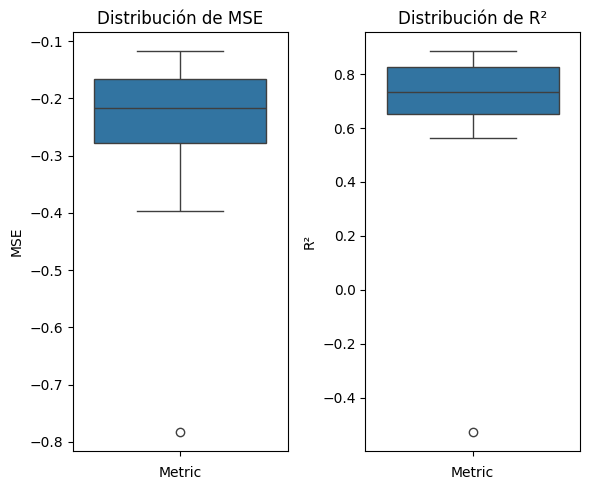

In [ ]:
# Apoyo gráfico para interpretar la validación

# Convertir las métricas en DataFrame para visualización
metrics_df1 = pd.DataFrame({
    "Fold": np.arange(1, folds + 1),
    "MSE": scores_mse,
    "R²": scores_r2,
    "Modelo": "Original"
})

# Boxplots para las métricas
plt.figure(figsize=(6, 5))

# MSE
plt.subplot(1, 2, 1)
sns.boxplot(data=metrics_df1, y="MSE")
plt.title("Distribución de MSE")
plt.ylabel("MSE")
plt.xlabel("Metric")

# R²
plt.subplot(1, 2, 2)
sns.boxplot(data=metrics_df1, y="R²")
plt.title("Distribución de R²")
plt.ylabel("R²")
plt.xlabel("Metric")

plt.tight_layout()
plt.show()

### Pregunta 8 ###
A la vista de los resultados de validación, ¿Existen problemas de varianza en los modelos entrenados?¿Por qué?

***Respuesta:***

Según los resultados de la validación podemos observar que podrían existir problemas de varianza, esto debido a que los diagramas de caja para MSE y R2 muestran una dispersión considerable en los resultados de los diferentes folds, adicional a esto los rangos de valores para MSE y R2 son relativamente amplios lo que indica mayor varianza, de igual forma  no se observan valores atípicos claros en los diagramas de caja , la dispersión de los valores dentro de las cajas aún sugiere variabilidad.

Como siguiente paso, vamos a aplicar selección de variables a nuestro conjunto de datos para ver si somos capaces de encontrar un modelo que, a través de un conjunto menor de variables, sea capaz de predecir muy parecido o mejor incluso que el modelo de regresión lineal que acabamos de obtener en primera instancia.

Para ello vamos a proceder de dos formas. La primera consiste en llevar a cabo un metodo automatico de selección de variables hacía adelante (Forward). En los siguientes bloques de código, se ha de programar las instrucciones necesarias para llevar a cabo esta selección de variables. Se valorará mostrar el gráfico secuencial que muestra el perfomance de cada iteración.

In [ ]:
# Selección Forward de variables

# Calculamos importancia relativa
df_relativeImp = relativeImp(X.join(y), outcomeName = 'Salary', driverNames = X.columns.tolist())

#pd.set_option('display.max_rows', None) # visualizar todas las filas con todas las variables

# Ordenamos valores
df_relativeImp=df_relativeImp.sort_values(by='normRelaImpt', ascending=False)

# Añadimos los coeficientes del modelo de regresión lineal de cada variable
df_relativeImp['Coeficientes'] = df_relativeImp['driver'].map(coef)
df_relativeImp.head(10)

,driver,rawRelaImpt,normRelaImpt,Coeficientes
2,Years of Experience,0.234151,25.752802,0.728400
0,Age,0.170790,18.784111,-0.095101
1,Education Level,0.098584,10.842645,0.067375
103,Job Title_Sales Associate,0.037750,4.151844,0.071828
30,Job Title_Data Scientist,0.036931,4.061787,1.269052
94,Job Title_Project Engineer,0.017559,1.931161,1.066247
114,Job Title_Software Developer,0.016273,1.789717,0.285358
91,Job Title_Product Manager,0.015060,1.656367,1.327537
116,Job Title_Software Engineer Manager,0.013934,1.532512,1.009918
108,Job Title_Sales Representative,0.012229,1.345015,0.095818


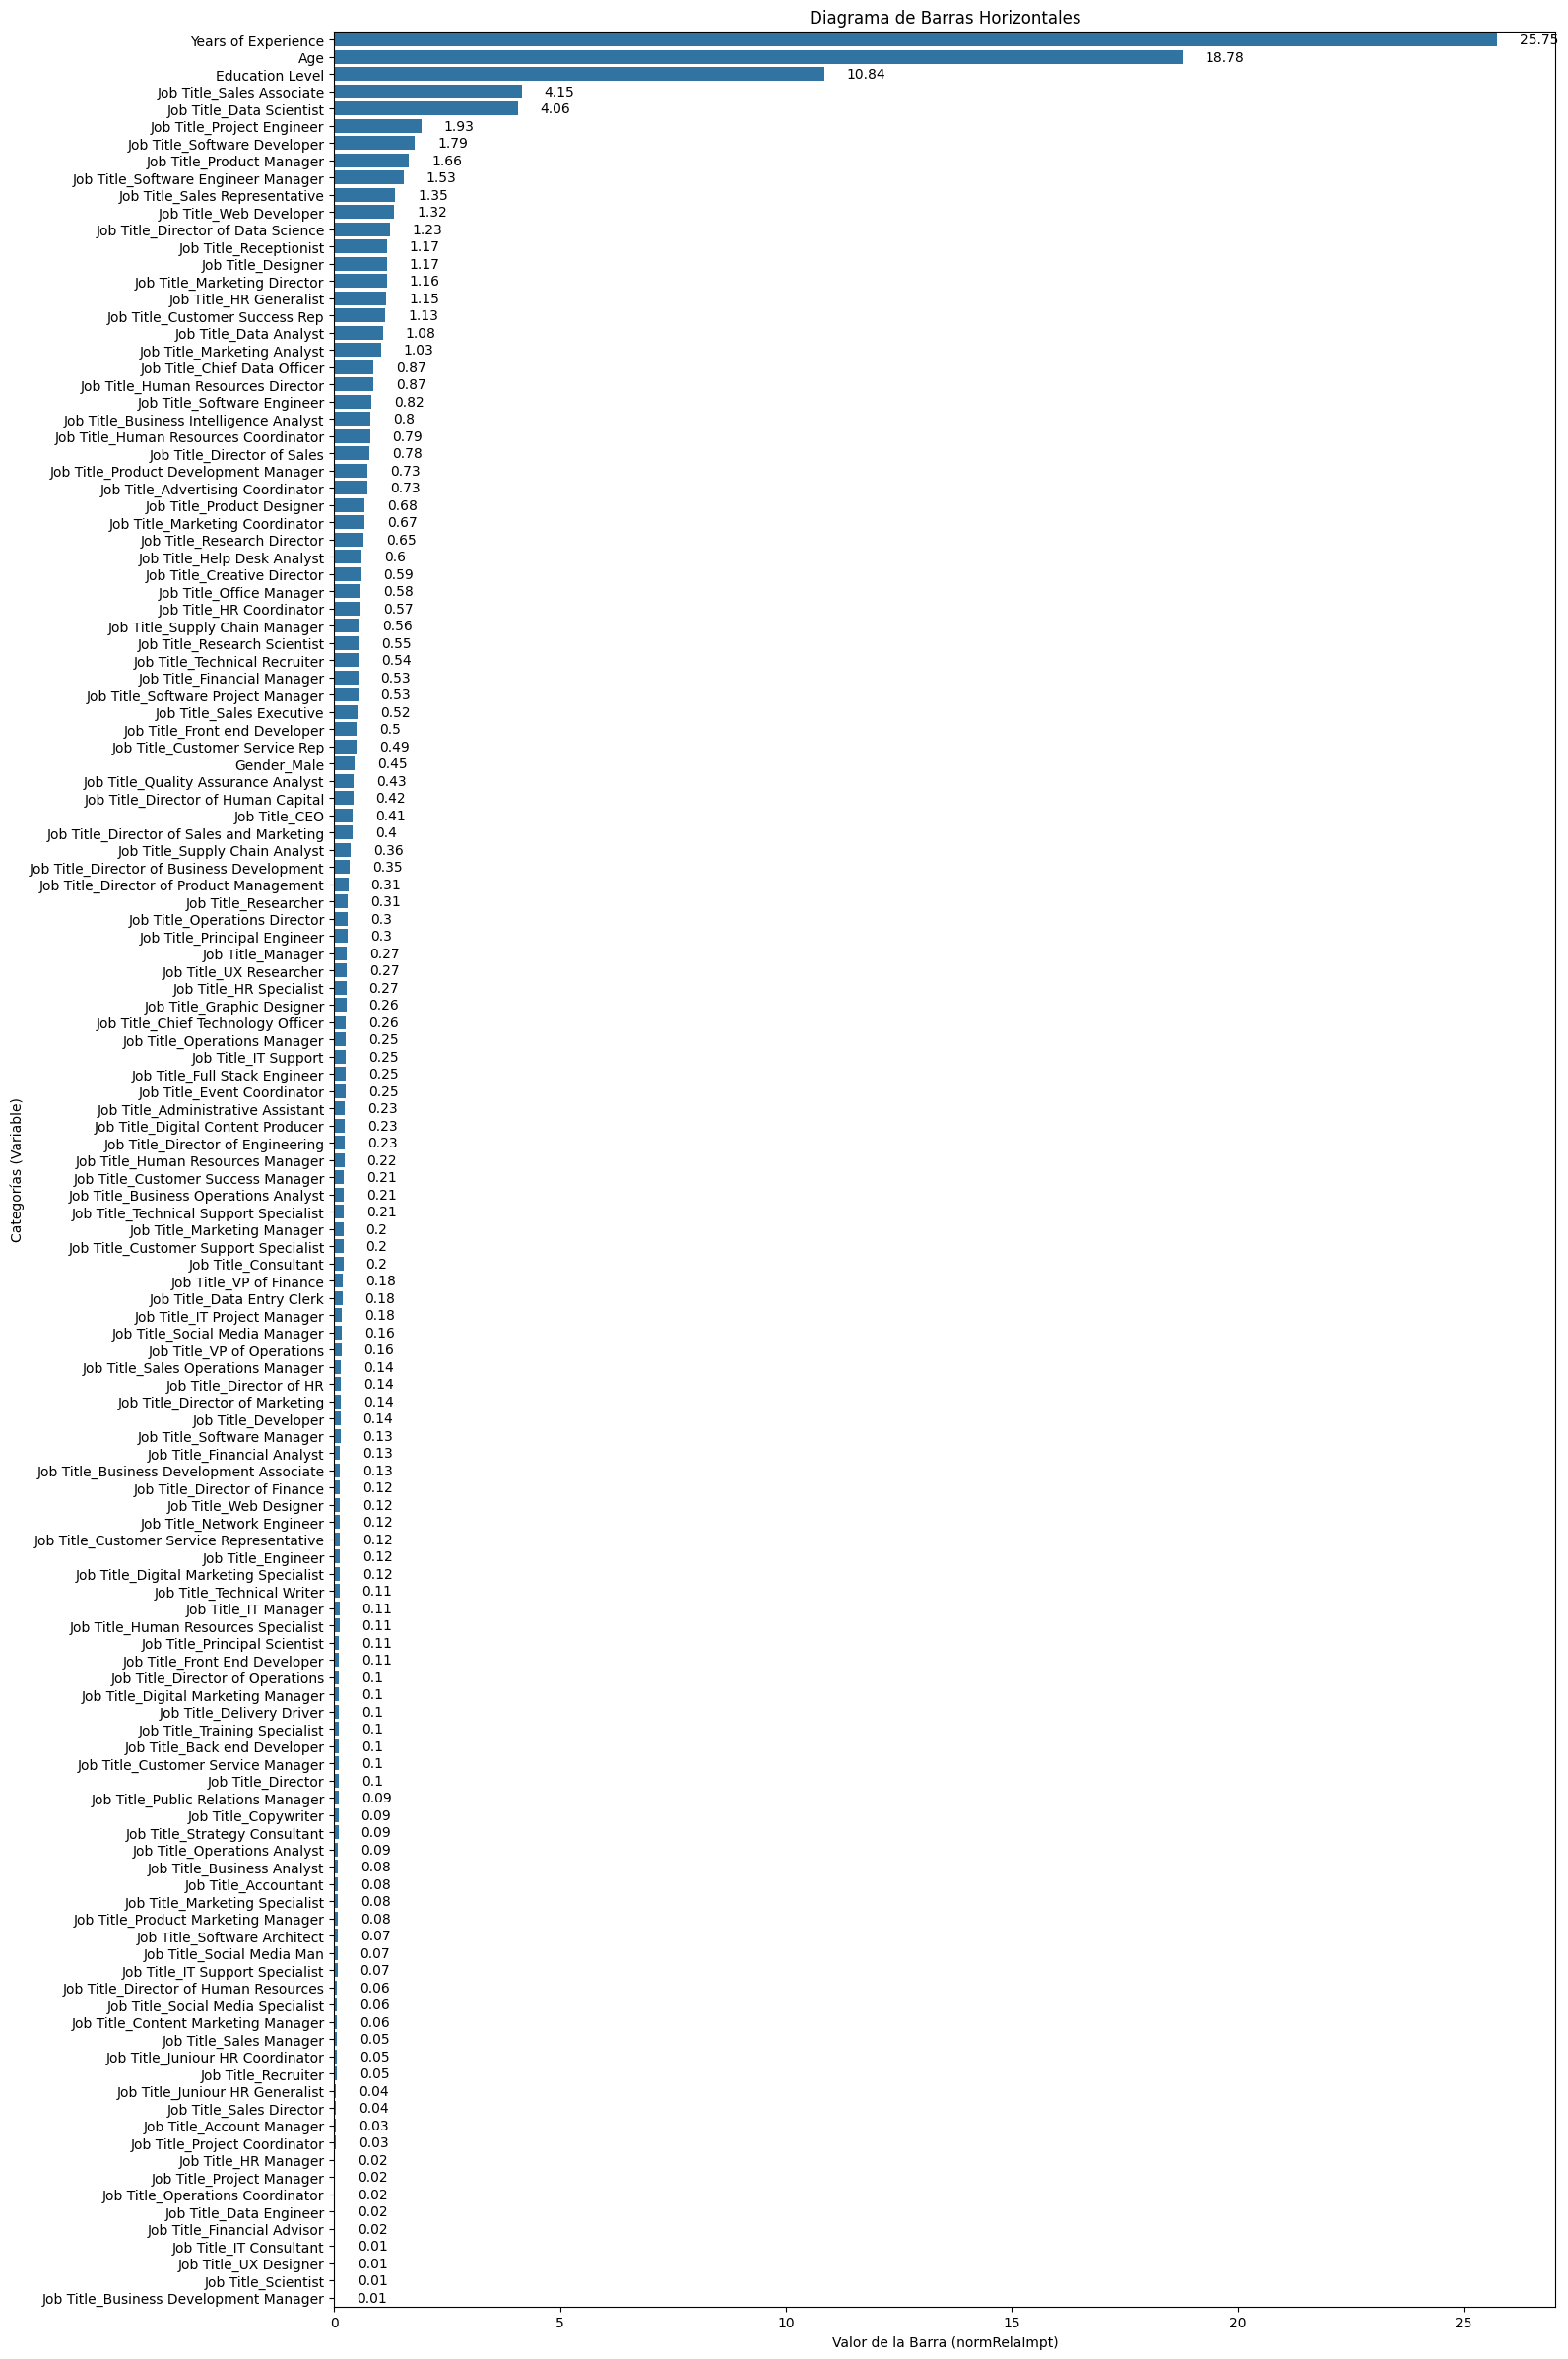

In [ ]:
# Gráfico de perfomance de la selección en cada iteración.

# Crear el diagrama de barras horizontales
plt.figure(figsize=(16, 30)) # Ajusta el tamaño del gráfico (ancho, alto)
ax = sns.barplot(x='normRelaImpt', y='driver', data=df_relativeImp, orient='h')

# Añadir los valores a la derecha de las barras
for index, value in enumerate(df_relativeImp['normRelaImpt']):
    ax.text(value + 0.5, index, f'{round(value, 2)}', va='center', ha='left')

# Etiquetas y título
plt.xlabel('Valor de la Barra (normRelaImpt)')
plt.ylabel('Categorías (Variable)')
plt.title('Diagrama de Barras Horizontales')

# Mostrar el gráfico
plt.show()

### Pregunta 9 ###
¿Cuál es el número de variables seleccionadas por el método aplicado? ¿cuál es el valor de la métrica escogida para la selección de las variables, en la iteración correspondiente al número de variables seleccionadas?

***Respuesta:***

El número de variables por el método aplicado de 'normRelaImpt' es de 5: **Years of Experience**,  **Age**,  **Education Level**, **Job Title_Sales Associate**,  **Job title_ Data Scientist**  el valor de la metrica tomando en cuenta que este metodo clasifica las caracteristicas por su importancia relativa,

La primera variable tiene un 'normRelaImpt' de

1.   La primera variable tiene un 'normRelaImpt' de alrededor de 59.
2.   La segunda variable tiene un 'normRelaImpt' de alrededor de 29.
3.   La tercera variable tiene un 'normRelaImpt' de alrededor de 5.
4.   La cuarta variable tiene un 'normRelaImpt' de alrededor de 3.
5.   La quinta variable tiene un 'normRelaImpt' de alrededor de 2.


Una vez realizada la selección de variables, se ha de entrenar un modelo de regresión lineal con dichas variables y mostrar el resumen del modelo entrenado. Una vez entrenado, aplicar validación cruzada para evaluar el modelo en todo el conjunto de datos para validar la generalización del modelo. De nuevo, la validación ha de ser en base a las 2 métricas escogidas en puntos anteriores, sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [ ]:
print(f"Factor de correlación entre Salary y Years of Experience antes de transformar : {data['Salary'].corr(data['Years of Experience'])}")

# Transformación de odometer mediante BoxCox
# Use the correct column name 'Years of Experience'
data['Years of Experience'], _ = boxcox(data['Years of Experience'] + abs(data['Years of Experience'].min()) + 1)

print(f"Factor de correlación entre Salary y Years of Experience después de transformar : {data['Salary'].corr(data['Years of Experience'])}")

Factor de correlación entre Salary y Years of Experience antes de transformar : 0.8179848110756069
Factor de correlación entre Salary y Years of Experience después de transformar : 0.8471486857934559


In [ ]:
print(f"Factor de correlación entre Salary y Age antes de transformar : {data['Salary'].corr(data['Age'])}")

# Transformación de odometer mediante BoxCox
# Use the correct column name 'Age'
data['Age'], _ = boxcox(data['Age'] + abs(data['Age'].min()) + 1)

print(f"Factor de correlación entre Salary y Age después de transformar : {data['Salary'].corr(data['Age'])}")

Factor de correlación entre Salary y Age antes de transformar : 0.7157495671331586
Factor de correlación entre Salary y Age después de transformar : 0.7281743970977999


In [ ]:
# Ajustar modelo regresión lineal para variables seleccionadas
# Redefinir la variable objetivo (y) y las predictoras (X) incluyendo las transformadas
X = data.drop('Salary', axis=1)
y = data['Salary']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar un término de intercepción manualmente
X_train = sm.add_constant(X_train)  # Agrega una columna de 1s para el intercepto

# Crear y ajustar el modelo
model = sm.OLS(y_train, X_train).fit()

# Extraer los coeficientes
coef = model.params

# Mostrar el resumen detallado del modelo
print(model.summary())

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# MSE en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"mse: {mse_train}")

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:34:21   Log-Likelihood:                -2326.6
No. Observations:                5188   AIC:                             4893.
Df Residuals:                    5068   BIC:                             5680.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
# Aplicar validación cruzada

# Crear el modelo envuelto
model = StatsmodelsOLS()

folds = 10
# Realizar validación cruzada con R^2
scores_r2 = cross_val_score(model, X, y, cv=folds, scoring='r2')

# Estadisticas de los R^2
print("R^2 promedio:", scores_r2.mean())
print("R^2 std:", scores_r2.std())
print("R^2 por fold:", scores_r2)

R^2 promedio: 0.6923274271470711
R^2 std: 0.30532288366174065
R^2 por fold: [ 0.59714349 -0.19017273  0.80810878  0.75382514  0.71965282  0.85164856
  0.89276486  0.7994002   0.88082942  0.81007372]


In [ ]:
# Crear el modelo envuelto
model = StatsmodelsOLS()

# Validación cruzada con mse como métrica
scores_mse = cross_val_score(model, X, y, cv=folds, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Estadisticas de los mse
print("mse promedio:", scores_mse.mean())
print("mse std:", scores_mse.std())
print("mse por fold:", scores_mse)

mse promedio: -0.2247915134784463
mse std: 0.1473419351132764
mse por fold: [-0.36705451 -0.61000151 -0.1449865  -0.18814244 -0.22881739 -0.10916341
 -0.11941475 -0.15324518 -0.12083985 -0.2062496 ]


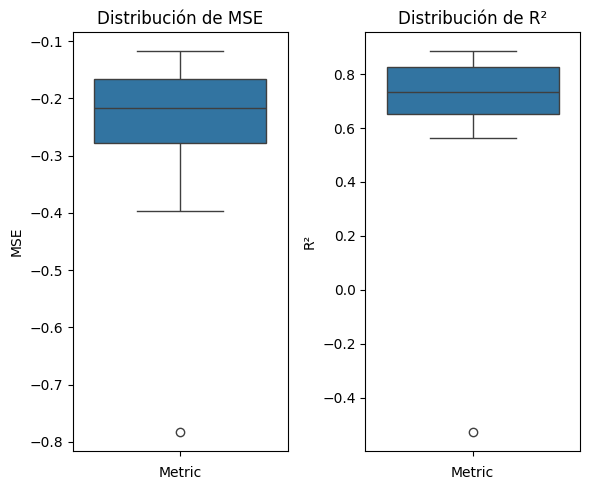

In [ ]:
# Apoyo gráfico para interpretar la validación

# Convertir las métricas en DataFrame para visualización
metrics_df2 = pd.DataFrame({
    "Fold": np.arange(1, folds+1),
    "MSE": scores_mse,
    "R²": scores_r2,
    "Modelo": "Transformado"
})

# Boxplots para las métricas
plt.figure(figsize=(6, 5))

# MSE
plt.subplot(1, 2, 1)
sns.boxplot(data=metrics_df1, y="MSE")
plt.title("Distribución de MSE")
plt.ylabel("MSE")
plt.xlabel("Metric")

# R²
plt.subplot(1, 2, 2)
sns.boxplot(data=metrics_df1, y="R²")
plt.title("Distribución de R²")
plt.ylabel("R²")
plt.xlabel("Metric")

plt.tight_layout()
plt.show()



### Pregunta 10 ###
En base a los resultados obtenidos, comparar con los resultados obtenidos para el modelo de regresión lineal y explicar las conclusiones sobre cuál de los 2 modelos parece aportar más beneficios para el objetivo del proyecto.

***Respuesta:***

En base a los resultados obtenidos podemos comparar ambos modelos lo cual nos indica que el Modelo 2 tiene un R-cuadrado (0.858) y un R-cuadrado ajustado (0.855) más altos en comparación con el Modelo 1 (0.833 y 0.830, respectivamente). Esto indica que el Modelo 2 explica una mayor proporción de la varianza en la variable objetivo ('Salary') y se ajusta mejor a los datos, incluso después de ajustar el número de predictores.
Adicional el Modelo 2 probablemente involucre menos predictores debido al proceso de selección de características. Esto lo hace más interpretable y potencialmente menos propenso al sobreajuste en comparación con el Modelo 1, que utilizó todas las características disponibles con lo cual aporta más beneficios para el objetivo del proyecto.

Ahora se ha de entrenar un nuevo modelo de regresión lineal pero esta vez, en lugar de aplicar una selección de variables como se acaba de realizar, el alumno debe llevar a cabo un analisis de compoenentes principales que reduzca la dimensionalidad del conjunto original de datos. Y a partir de dichas componentes, entrenar y evaluar el modelo de regresión lineal.

En primer lugar, se han escribir los bloques de código que permiten realizar el analisis de componentes principales.

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=94b3e198c77346b8bbfb0c91aff493c45934a780d0f08aa2b0c30b2cc1aaf149
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, FactorAnalyzer
from sklearn.cluster import KMeans
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# estandarizamos las variables numericas

df_num = data.select_dtypes(include=np.number)

df_num = (df_num - df_num.mean()) / df_num.std()

In [ ]:
# Seleccionar solo las columnas numéricas
df_num = data.select_dtypes(include=[np.number])

# estandarizamos las variables numericas
df_num = (df_num - df_num.mean()) / df_num.std()

In [ ]:
# Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_num)

# Mostrar el índice KMO general
print(f"Índice KMO (global): {kmo_model:.4f}")

# Mostrar el índice KMO por variable
print("Índices KMO por variable:")
print(kmo_all)
print(df_num.columns)

Índice KMO (global): 0.0014
Índices KMO por variable:
[7.58660343e-01 9.64341272e-01 7.08456856e-01 8.42657981e-01
 8.23579394e-01 1.86344683e-05 3.46535920e-05 2.51211205e-05
 1.62849459e-05 6.26259601e-04 5.04180953e-05 7.11038566e-05
 2.39225535e-05 8.05355913e-06 4.15785202e-05 5.73640941e-05
 4.13015431e-05 6.50386248e-05 2.79757177e-05 2.43415922e-04
 2.93764428e-05 1.76290486e-05 2.62477870e-05 2.17102186e-05
 1.16318823e-04 2.05391095e-05 2.79525354e-05 2.42966098e-05
 1.34924195e-03 6.86049505e-05 3.61397470e-05 3.77537684e-03
 1.47659579e-04 2.10922234e-05 3.19438470e-05 1.68164645e-05
 1.15727284e-04 1.15400590e-04 3.95237556e-05 2.89410921e-05
 1.04283295e-03 4.94686800e-05 4.79877968e-05 4.63187160e-04
 3.55275719e-05 6.37331924e-05 4.41576265e-04 1.83291898e-04
 3.25255629e-05 2.79670424e-05 4.52872409e-05 3.57981401e-05
 2.20787966e-05 1.91793172e-05 1.71126608e-04 5.08725514e-04
 1.86636931e-04 9.53912200e-04 5.76164353e-04 2.21342538e-04
 3.23015413e-04 4.88382480e-04 

In [ ]:
# Realizar el test de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df_num)

# Mostrar resultados
print(f"Valor de chi-cuadrado: {chi_square_value:.4f}")
print(f"p-valor: {p_value:.4f}")

Valor de chi-cuadrado: 90205.5404
p-valor: 0.0000


In [ ]:
# Crear el analisis de PCA a partir del conjunto de variables predictoras
pca = PCA()
pca.fit(df_num)

PCA()

In [ ]:
# Recuperamos la información de autovalores y autovectores
explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
autovectores = pca.components_

In [ ]:
df_pca_results = pd.DataFrame({
    'Componente':np.array(range(pca.n_components_)),
    'Explained Variance':explained_var,
    'Explained Variance Ratio':explained_var_ratio
})

# Agregar la columna con la suma acumulada del ratio
df_pca_results['Cumulative Explained Variance Ratio (%)'] = 100*df_pca_results['Explained Variance Ratio'].cumsum()
df_pca_results

,Componente,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance Ratio (%)
0,0,3.903057,0.029346,2.934629
1,1,1.447029,0.010880,4.022621
2,2,1.206798,0.009074,4.929988
3,3,1.160504,0.008726,5.802548
4,4,1.100997,0.008278,6.630365
5,5,1.062329,0.007987,7.429108
6,6,1.053917,0.007924,8.221527
7,7,1.049241,0.007889,9.010430
8,8,1.047130,0.007873,9.797746
9,9,1.044339,0.007852,10.582963


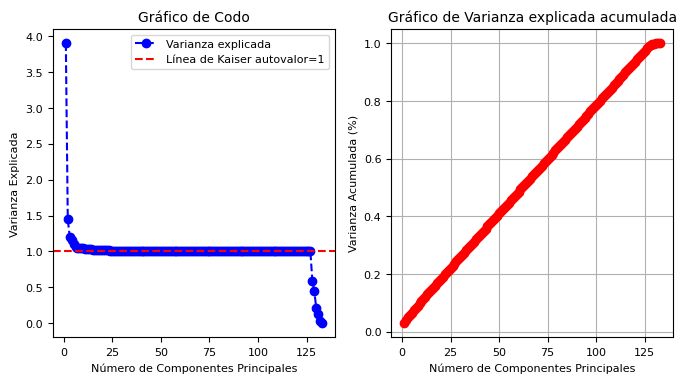

In [ ]:
# Graficar la varianza explicada acumulada (scree-plot)

plt.figure(figsize=(8, 4))

# Varianza explicada por cada componente
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', color='b', label='Varianza explicada')
plt.axhline(y=1, color='r', linestyle='--', label='Línea de Kaiser autovalor=1')
plt.title('Gráfico de Codo', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Varianza Explicada', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

# Varianza explicada acumulada
plt.subplot(1, 2, 2)
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='r', label='Varianza explicada acumulada')
plt.title('Gráfico de Varianza explicada acumulada', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Varianza Acumulada (%)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:

# Calcula el número de componentes principales que explican el 95% de la varianza
cumulative_variance_ratio = np.cumsum(explained_var_ratio)
num_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Para un porcentaje de varianza explicada del 95%, se necesitan {num_components_95} componentes principales.")


Para un porcentaje de varianza explicada del 95%, se necesitan 122 componentes principales.


### Pregunta 11 ###
Para un porcentaje de varianza explicada del 95%, ¿cuál es el número de componentes principales que consiguen explicar dicho porcentaje de varianza?

***Respuesta:***

Para un porcentaje de varianza explicada del 95%, se necesitan 122 componentes principales.

A continuación, con las nuevas componentes principales como variables predictoras y los datos proyectados sobre ellas, entrenar un modelo de regresión lineal y mostrar los resultados del entrenamiento. Una vez entrenado, aplicar validación cruzada para evaluar el modelo en todo el conjunto de datos validando así la generalización del modelo. De nuevo, la validación ha de ser en base a las 2 métricas escogidas en puntos anteriores, sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [ ]:
# Crear un nuevo modelo de regresión lineal con las componentes principales
pca = PCA()

# Ajustar PCA a las variables predictoras (X)
pca.fit(X)

# Transformar los datos
X_pca = pca.transform(X)

# Continuar con el resto de tu código...
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Mostrar resultados del entrenamiento
print("Coeficiente de determinación (R²) en el conjunto de entrenamiento:", model_pca.score(X_train_pca, y_train))


Coeficiente de determinación (R²) en el conjunto de entrenamiento: 0.8579458588683799


In [ ]:
# Ajustar modelo regresión lineal para variables seleccionadas proyectadas
# Redefinir la variable objetivo (y) y las predictoras (X) incluyendo las transformadas
X = data[['Years of Experience', 'Age', 'Education Level', 'Job Title_Sales Associate', 'Job Title_Data Scientist']]  # Usar solo las variables seleccionadas
y = data['Salary']

In [ ]:
# Mostrar principales atributos, coeficientes, etc. del modelo entrenado


# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar un término de intercepción manualmente
X_train = sm.add_constant(X_train)  # Agrega una columna de 1s para el intercepto

# Crear y ajustar el modelo
model = sm.OLS(y_train, X_train).fit()

# Extraer los coeficientes
coef = model.params

# Mostrar el resumen detallado del modelo
print(model.summary())

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# MSE en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"mse: {mse_train}")

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     3376.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:34:38   Log-Likelihood:                -3631.0
No. Observations:                5188   AIC:                             7274.
Df Residuals:                    5182   BIC:                             7313.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Aplicar validación cruzada

# Validación cruzada con mse como métrica
model = LinearRegression()
scores_mse = cross_val_score(model, X, y, cv=folds, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Estadisticas de los mse
print("mse promedio:", scores_mse.mean())
print("mse std:", scores_mse.std())
print("mse por fold:", scores_mse)



mse promedio: -0.2930642421098239
mse std: 0.2495572416738196
mse por fold: [-0.59379711 -0.92428365 -0.25998379 -0.15036633 -0.13389291 -0.23691336
 -0.20335147 -0.13801354 -0.0816115  -0.20842878]


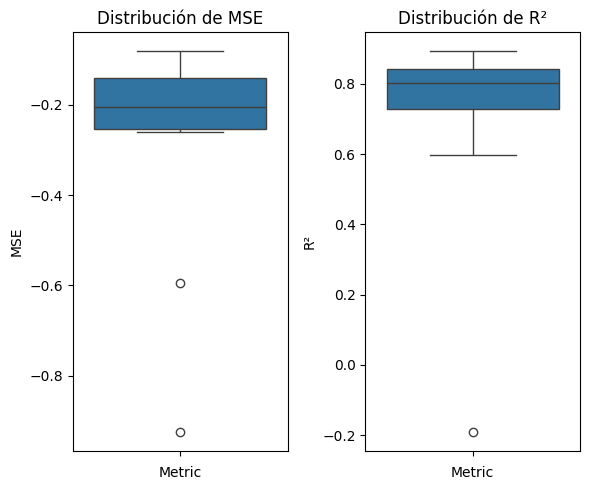

In [ ]:
# Apoyo gráfico para interpretar la validación


# Convertir las métricas en DataFrame para visualización
metrics_df3 = pd.DataFrame({
    "Fold": np.arange(1, folds+1),
    "MSE": scores_mse,
    "R²": scores_r2,
    "Modelo": "Proyectado"
})


# Boxplots para las métricas
plt.figure(figsize=(6, 5))

# MSE
plt.subplot(1, 2, 1)
sns.boxplot(data=metrics_df3, y="MSE")
plt.title("Distribución de MSE")
plt.ylabel("MSE")
plt.xlabel("Metric")

# R²
plt.subplot(1, 2, 2)
sns.boxplot(data=metrics_df3, y="R²")
plt.title("Distribución de R²")
plt.ylabel("R²")
plt.xlabel("Metric")

plt.tight_layout()
plt.show()

### Pregunta 12 ###
En vista de los resultados, comparar con los anteriores 2 modelos entrenados (el original de regresión lineal y aquel al que aplicamos selección de variables con método forward). ¿Qué modelo de entre los 3 tiene el atributo *Condition Number* más bajo y por qué? En general y a modo de conclusión, ¿Qué modelo de los 3 parece más apropiado para el caso de uso y por qué?


- Modelo de regresión lineal original: Utilizó todas las variables, lo que podría generar un Condition Number alto si existen variables altamente correlacionadas.
- Modelo con selección de variables (forward): Este modelo redujo la cantidad de variables, lo que usualmente lleva a una menor multicolinealidad y un Condition Number más bajo.

El modelo con selección de variables presenta mejores métricas y podría tener un Condition Number más bajo que el modelo original al reducir la multicolinealidad.

En resumen,  el modelo con selección de variables parece ser más apropiado para el caso dado que reducen la complejidad del modelo, la multicolinealidad y potencian la generalización.






In [ ]:

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/saved_df.csv'
data.to_csv(file_path, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6485 entries, 0 to 6683
Columns: 133 entries, Age to Job Title_Web Developer
dtypes: float64(4), int64(129)
memory usage: 6.6 MB


***Respuesta:***

Pasamos ahora a cambiar el objetivo del proyecto pero haciendo uso del mismo conjunto de datos. Todas las transformaciones y preparaciones comunes que hayamos establecido, seguirán siendo válidas y tan solo quedarán aquellas específicas para este nuevo caso de uso.

La nueva variable objetivo será ***Gender***. El modelo debe ser capaz de determinar para cada registro si se trata de hombre o mujer según esta variable de genero. Las variables predictoras serán todas las demás (incluyendo en esta ocasión la variable ***Salary*** como una predictora más. El modelo que vamos a tratar de modelar para clasificar nuestros datos será de regresión logística.

En primer lugar, se debe transformar la variable categórica ***Gender*** codificándola con 0 cuando el registro sea *Female* o 1 cuando es *Male*. Una vez realizada esta transformación, ya tenemos preparada nuestra variable objetivo. En este caso, mantenemos y asumimos como valores correctos la imputación de valores nulos que se llevó a cabo en anteriores ejercicios correspondientes a la fase de preparación de los datos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import boxcox, shapiro, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
from relativeImp import relativeImp
from itertools import combinations
from statsmodels.tools import add_constant
from factor_analyzer import calculate_kmo
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)
from sklearn.utils import resample

In [ ]:
# Información df

df_pca_results


,Componente,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance Ratio (%)
0,0,3.903057,0.029346,2.934629
1,1,1.447029,0.010880,4.022621
2,2,1.206798,0.009074,4.929988
3,3,1.160504,0.008726,5.802548
4,4,1.100997,0.008278,6.630365
5,5,1.062329,0.007987,7.429108
6,6,1.053917,0.007924,8.221527
7,7,1.049241,0.007889,9.010430
8,8,1.047130,0.007873,9.797746
9,9,1.044339,0.007852,10.582963


A continuación, podríamos tratar de modelar la regresión logística con el dataset actual, tomando como variable objetivo ***Gender*** que acabamos de transformar. Lo más normal es que al hacerlo, el modelo de un error al entrenarlo por no llegar a converger o directamente porque la matriz a invertir para calcular los coeficientes, sea singular y no pueda invertirse. Esto se debe a colinealidad entre las variables predictoras. Queda a criterio del alumno, hacer él mismo la prueba de tratar de entrenar la regresión y verificar si efectivamente da problemas y no se consigue un modelo válido.

Por evitar esta situación, vamos a realizar un paso previo que consistirá en un analisis factorial, mediante el cual daremos con unos factores que por un lado nos aportarán información potencial subyacente sobre las variables latentes que pueda contener nuestro conjunto de variables predictoras, y por otro lado nos ayudará a reducir la dimensionalidad del conjunto para evitar la multicolinealidad. Esto nos permitirá llevar a cabo el entrenamiento del modelo de regresión lineal.

Los siguientes bloques de código deben ajustar un analisis de componentes principales a partir de nuestro conjunto de variables predictoras recién definido. Después se debe mostrar en una tabla cada uno de los autovectores, su correspondiente autovalor, el porcentaje de varianza explicada y el porcentaje de varianza acumulada estando las componentes ordenadas de mayor a menor porcentaje de varianza explicada. Por último, se debe mostrar en un gráfico de tipo scree-plot (gráfico de codo), la varianza explicada en función del número de componentes principales.

In [ ]:
# Usar PCA para obtener autovectores y autovalores

# Crear el análisis de PCA a partir del conjunto de variables predictoras
X = data.drop('Gender', axis=1)  # Eliminar la variable objetivo
pca = PCA()
pca.fit(X)

# Recuperamos la información de autovalores y autovectores
explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
autovectores = pca.components_

df_pca_results = pd.DataFrame({
    'Componente': np.array(range(pca.n_components_)),
    'Autovalor': explained_var,
    'Varianza Explicada': explained_var_ratio
})



In [ ]:
#  Mostrar la tabla con autovectores, autovalores, porcentaje de varianza explicada y acumulada

# Mostrar la tabla con autovectores, autovalores, porcentaje de varianza explicada y acumulada
# Agregar la columna con la suma acumulada del ratio
df_pca_results['Varianza Acumulada'] = df_pca_results['Varianza Explicada'].cumsum()

# Ordenar por varianza explicada de mayor a menor
df_pca_results = df_pca_results.sort_values('Varianza Explicada', ascending=False)

# Mostrar la tabla de resultados
print(df_pca_results)

     Componente  Autovalor  Varianza Explicada  Varianza Acumulada
0             0   1.811488        5.677740e-01            0.567774
1             1   0.387026        1.213055e-01            0.689079
2             2   0.112397        3.522848e-02            0.724308
3             3   0.085783        2.688706e-02            0.751195
4             4   0.063976        2.005191e-02            0.771247
5             5   0.051809        1.623859e-02            0.787486
6             6   0.047521        1.489456e-02            0.802380
7             7   0.045133        1.414598e-02            0.816526
8             8   0.043493        1.363197e-02            0.830158
9             9   0.038407        1.203802e-02            0.842196
10           10   0.036560        1.145892e-02            0.853655
11           11   0.035388        1.109162e-02            0.864747
12           12   0.029564        9.266111e-03            0.874013
13           13   0.026665        8.357590e-03            0.88

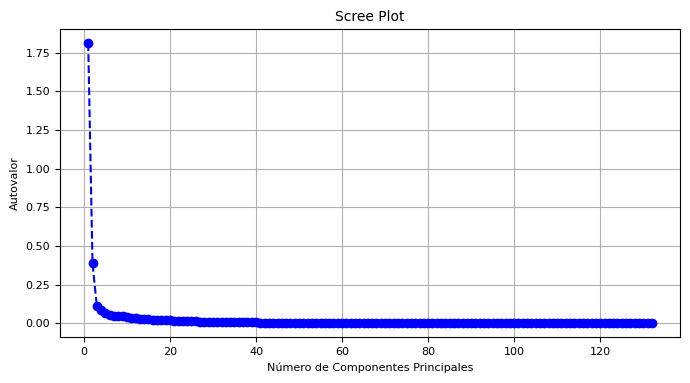

In [ ]:
# Graficar la varianza explicada acumulada (scree-plot)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', color='b', label='Varianza Explicada')
plt.title('Scree Plot', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Autovalor', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()


In [ ]:
# Número de componentes con el 95% de la varianza
num_components_95 = df_pca_results[df_pca_results['Varianza Acumulada'] >= 0.95].iloc[0]['Componente'] + 1

print(f"El número de componentes que explican el 95% de la varianza es: {num_components_95}")

El número de componentes que explican el 95% de la varianza es: 27.0


In [ ]:
# Número de factores según el criterio de Kaizer
num_componentes_Kaiser = len(df_pca_results[df_pca_results['Autovalor'] > 1])

print(f"El número de factores a seleccionar según el criterio de Kaiser es: {num_componentes_Kaiser}")

El número de factores a seleccionar según el criterio de Kaiser es: 1


### Pregunta 13 ###
De acuerdo a los resultados de la tabla, ¿Qué número de componentes consiguen explicar el 95% de la varianza conjunta de nuestro dataset?
Por otor lado, viendo también la gráfica obtenida, ¿Cuántos factores debemos escoger según el criterio de Kaiser?

***Respuesta:***

El número de componentes que explican el 95% de la varianza es  27 y
el número de factores a seleccionar según el criterio de Kaiser es 1

Muestra en una tabla las cargas factoriales para el listado de variables. Cada columna debe hacer referencia a cada factor seleccionado mediante el criterio de Kaiser.

In [ ]:
# Ajuste de Analisis Factorial para numero de factores según Kaiser

# Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_num)

# Mostrar el índice KMO general
print(f"Índice KMO (global): {kmo_model:.4f}")

# Mostrar el índice KMO por variable
print("Índices KMO por variable:")
print(kmo_all)
print(df_num.columns)


Índice KMO (global): 0.0014
Índices KMO por variable:
[7.58660343e-01 9.64341272e-01 7.08456856e-01 8.42657981e-01
 8.23579394e-01 1.86344683e-05 3.46535920e-05 2.51211205e-05
 1.62849459e-05 6.26259601e-04 5.04180953e-05 7.11038566e-05
 2.39225535e-05 8.05355913e-06 4.15785202e-05 5.73640941e-05
 4.13015431e-05 6.50386248e-05 2.79757177e-05 2.43415922e-04
 2.93764428e-05 1.76290486e-05 2.62477870e-05 2.17102186e-05
 1.16318823e-04 2.05391095e-05 2.79525354e-05 2.42966098e-05
 1.34924195e-03 6.86049505e-05 3.61397470e-05 3.77537684e-03
 1.47659579e-04 2.10922234e-05 3.19438470e-05 1.68164645e-05
 1.15727284e-04 1.15400590e-04 3.95237556e-05 2.89410921e-05
 1.04283295e-03 4.94686800e-05 4.79877968e-05 4.63187160e-04
 3.55275719e-05 6.37331924e-05 4.41576265e-04 1.83291898e-04
 3.25255629e-05 2.79670424e-05 4.52872409e-05 3.57981401e-05
 2.20787966e-05 1.91793172e-05 1.71126608e-04 5.08725514e-04
 1.86636931e-04 9.53912200e-04 5.76164353e-04 2.21342538e-04
 3.23015413e-04 4.88382480e-04 

In [ ]:
# Matriz de cargas factoriales

# Seleccionar el número de factores según el criterio de Kaiser
n_factors = num_componentes_Kaiser

# Crear el modelo de análisis factorial
fa = FactorAnalyzer(n_factors=n_factors, rotation=None)  # Puedes cambiar la rotación si lo deseas
fa.fit(X)

# Obtener las cargas factoriales
loadings = fa.loadings_

# Crear un DataFrame con las cargas factoriales
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Mostrar la tabla de cargas factoriales
df_loadings


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor 1
Age,0.871829
Education Level,0.744851
Years of Experience,0.979392
Salary,0.885821
Job Title_Account Manager,-0.009573
Job Title_Accountant,-0.019386
Job Title_Administrative Assistant,-0.002511
Job Title_Advertising Coordinator,-0.009737
Job Title_Back end Developer,-0.058149
Job Title_Business Analyst,-0.003988


### Pregunta 14 ###
En base a los factores seleccionados mediante el método de Kaiser, haz una interpretación del significado de los factores.

***Respuesta:***

En base a los factores seleccionados mediante el método de Kaiser (en este caso, 1 factor), podemos interpretar su significado analizando las cargas factoriales más altas en ese factor.

Observando las cargas factoriales más altas en el Factor 1 (df_loadings["Factor 1"]), podemos identificar qué variables están fuertemente relacionadas con este factor.
Por ejemplo, si "Years of Experience" tiene una carga factorial alta y positiva, significa que esta variable está fuertemente asociada al Factor 1.
Si "Education Level" también tiene una carga alta y positiva, indica que la experiencia y la educación contribuyen significativamente a este factor.

Con base en las variables con cargas altas, podemos intentar darle un nombre o significado al Factor 1.
Por ejemplo, si las variables relacionadas con el desempeño laboral, la experiencia y la educación tienen altas cargas factoriales en el Factor 1, podríamos interpretarlo como un factor de "Competencia laboral".
 Si las variables relacionadas con el puesto de trabajo, la ubicación o el tipo de empresa tienen altas cargas factoriales, podríamos interpretarlo como un factor de "Oportunidades laborales".

Para continuar con el analisis, vamos a seleccionar los 2 primeros factores. En el siguiente bloque de código se ha de presentar una tabla con las cargas factoriales de cada variable para los 2 factores seleccionados. Aplicar una rotación si se considera oportuno para ayudar a la interpretación de los factores. Después, se ha de mostrar en otra tabla las comunalidades y unicidades (ambas en expresadas como porcentaje). Por último, se ha de mostrar un diagrama biplot que represente, en función de los 2 factores escogidos, las variables que mayor representación según las cargas factoriales. Es decir, aquellas variables que tengan al menos una carga factorial mayor que 0.3. Esto reducirá el número de vectores a representar y hará que la visualización sea más legible.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Tabla de Cargas Factoriales:
                                            Factor 1  Factor 2
Age                                         0.881662  0.285852
Education Level                             0.833942 -0.588282
Years of Experience                         0.972856  0.261369
Salary                                      0.862644  0.047892
Job Title_Account Manager                  -0.009574  0.012557
Job Title_Accountant                       -0.019105  0.003801
Job Title_Administrative Assistant         -0.002552  0.017917
Job Title_Advertising Coordinator          -0.009568  0.000656
Job Title_Back end Developer               -0.058088  0.010730
Job Title_Business Analyst                 -0.003825  0.013716
Job Title_Business Development Associate   -0.030926 -0.006200
Job Title_Business Development Manager      0.004091  0.016269
Job Title_Business Intelligence Analyst     0.000514 -0.003922
Job Title_Business Operations Analyst      -0.019685 -0.005807
Job Title_CEO             

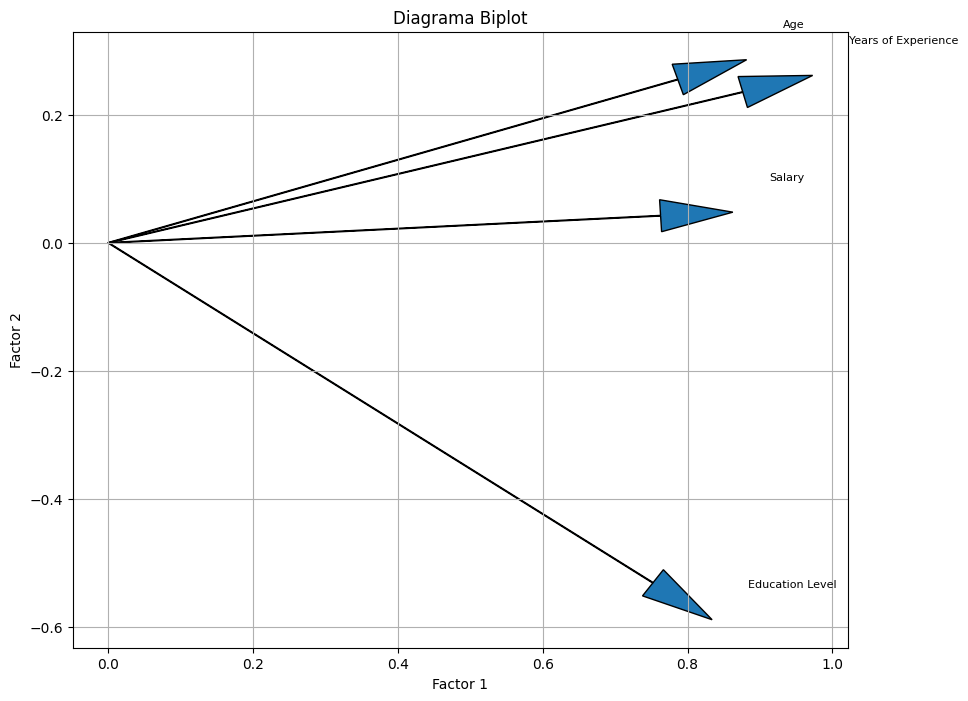

In [ ]:
# Tabla de cargas factoriales para los 2 factores (incluyendo rotación si se elige)

# Seleccionar los 2 primeros factores
n_factors = 2

# Crear el modelo de análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(X)

# Obtener las cargas factoriales
loadings = fa.loadings_

# Crear un DataFrame con las cargas factoriales
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Mostrar la tabla de cargas factoriales
print("Tabla de Cargas Factoriales:")
print(df_loadings)

# Obtener comunalidades y unicidades
communalities = fa.get_communalities()
uniquenesses = 1 - communalities

# Crear un DataFrame con comunalidades y unicidades en porcentaje
df_communalities_uniquenesses = pd.DataFrame({
    'Comunalidad (%)': communalities * 100,
    'Unicidad (%)': uniquenesses * 100
}, index=X.columns)

# Mostrar la tabla de comunalidades y unicidades
print("\nTabla de Comunalidades y Unicidades:")
print(df_communalities_uniquenesses)

# Crear un diagrama biplot
plt.figure(figsize=(10, 8))

# Seleccionar variables con al menos una carga factorial mayor que 0.3
variables_to_plot = []
for col in df_loadings.columns:
  variables_to_plot.extend(df_loadings[df_loadings[col].abs() > 0.3].index.tolist())
variables_to_plot = list(set(variables_to_plot))

# Graficar las variables
for variable in variables_to_plot:
  plt.arrow(0, 0, df_loadings.loc[variable, 'Factor 1'], df_loadings.loc[variable, 'Factor 2'],
            head_width=0.05, head_length=0.1, length_includes_head=True)
  plt.text(df_loadings.loc[variable, 'Factor 1'] + 0.05, df_loadings.loc[variable, 'Factor 2'] + 0.05, variable, fontsize=8)

plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Diagrama Biplot")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Tabla de Cargas Factoriales:
                                            Factor 1  Factor 2
Age                                         0.881662  0.285852
Education Level                             0.833942 -0.588282
Years of Experience                         0.972856  0.261369
Salary                                      0.862644  0.047892
Job Title_Account Manager                  -0.009574  0.012557
Job Title_Accountant                       -0.019105  0.003801
Job Title_Administrative Assistant         -0.002552  0.017917
Job Title_Advertising Coordinator          -0.009568  0.000656
Job Title_Back end Developer               -0.058088  0.010730
Job Title_Business Analyst                 -0.003825  0.013716
Job Title_Business Development Associate   -0.030926 -0.006200
Job Title_Business Development Manager      0.004091  0.016269
Job Title_Business Intelligence Analyst     0.000514 -0.003922
Job Title_Business Operations Analyst      -0.019685 -0.005807
Job Title_CEO             

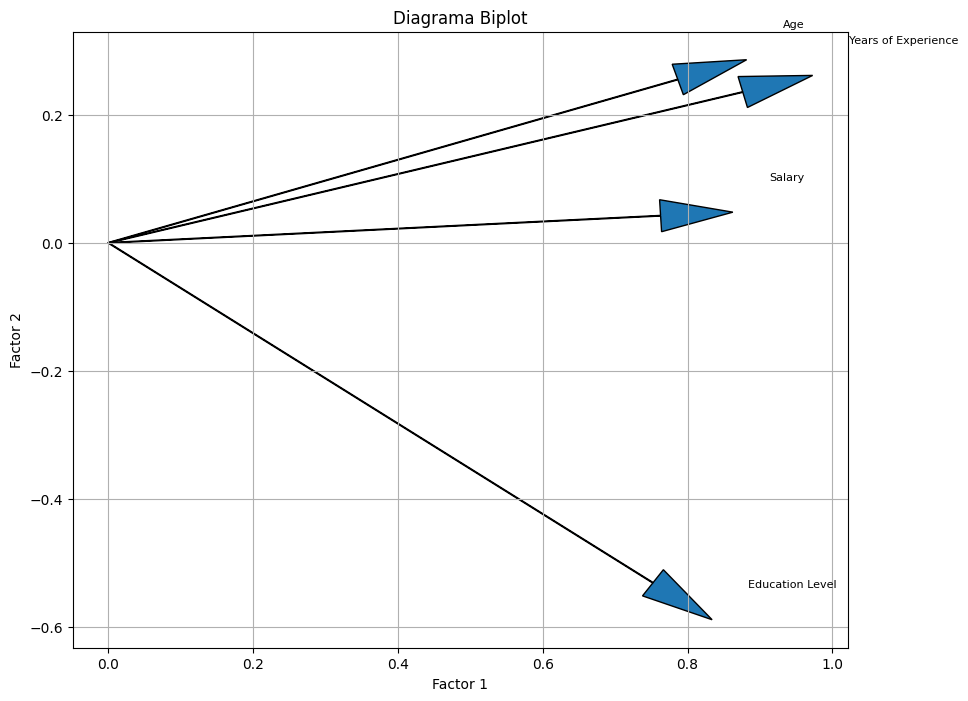

In [ ]:
# Tabla de comunalidades y unicidades

# Seleccionar los 2 primeros factores
n_factors = 2

# Crear el modelo de análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(X)

# Obtener las cargas factoriales
loadings = fa.loadings_

# Crear un DataFrame con las cargas factoriales
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Mostrar la tabla de cargas factoriales
print("Tabla de Cargas Factoriales:")
print(df_loadings)

# Obtener comunalidades y unicidades
communalities = fa.get_communalities()
uniquenesses = 1 - communalities

# Crear un DataFrame con comunalidades y unicidades en porcentaje
df_communalities_uniquenesses = pd.DataFrame({
    'Comunalidad (%)': communalities * 100,
    'Unicidad (%)': uniquenesses * 100
}, index=X.columns)

# Mostrar la tabla de comunalidades y unicidades
print("\nTabla de Comunalidades y Unicidades:")
print(df_communalities_uniquenesses)

# Crear un diagrama biplot
plt.figure(figsize=(10, 8))

# Seleccionar variables con al menos una carga factorial mayor que 0.3
variables_to_plot = []
for col in df_loadings.columns:
  variables_to_plot.extend(df_loadings[df_loadings[col].abs() > 0.3].index.tolist())
variables_to_plot = list(set(variables_to_plot))

# Graficar las variables
for variable in variables_to_plot:
  plt.arrow(0, 0, df_loadings.loc[variable, 'Factor 1'], df_loadings.loc[variable, 'Factor 2'],
            head_width=0.05, head_length=0.1, length_includes_head=True)
  plt.text(df_loadings.loc[variable, 'Factor 1'] + 0.05, df_loadings.loc[variable, 'Factor 2'] + 0.05, variable, fontsize=8)

plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Diagrama Biplot")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Tabla de Cargas Factoriales:
                                            Factor 1  Factor 2
Age                                         0.881662  0.285852
Education Level                             0.833942 -0.588282
Years of Experience                         0.972856  0.261369
Salary                                      0.862644  0.047892
Job Title_Account Manager                  -0.009574  0.012557
Job Title_Accountant                       -0.019105  0.003801
Job Title_Administrative Assistant         -0.002552  0.017917
Job Title_Advertising Coordinator          -0.009568  0.000656
Job Title_Back end Developer               -0.058088  0.010730
Job Title_Business Analyst                 -0.003825  0.013716
Job Title_Business Development Associate   -0.030926 -0.006200
Job Title_Business Development Manager      0.004091  0.016269
Job Title_Business Intelligence Analyst     0.000514 -0.003922
Job Title_Business Operations Analyst      -0.019685 -0.005807
Job Title_CEO             

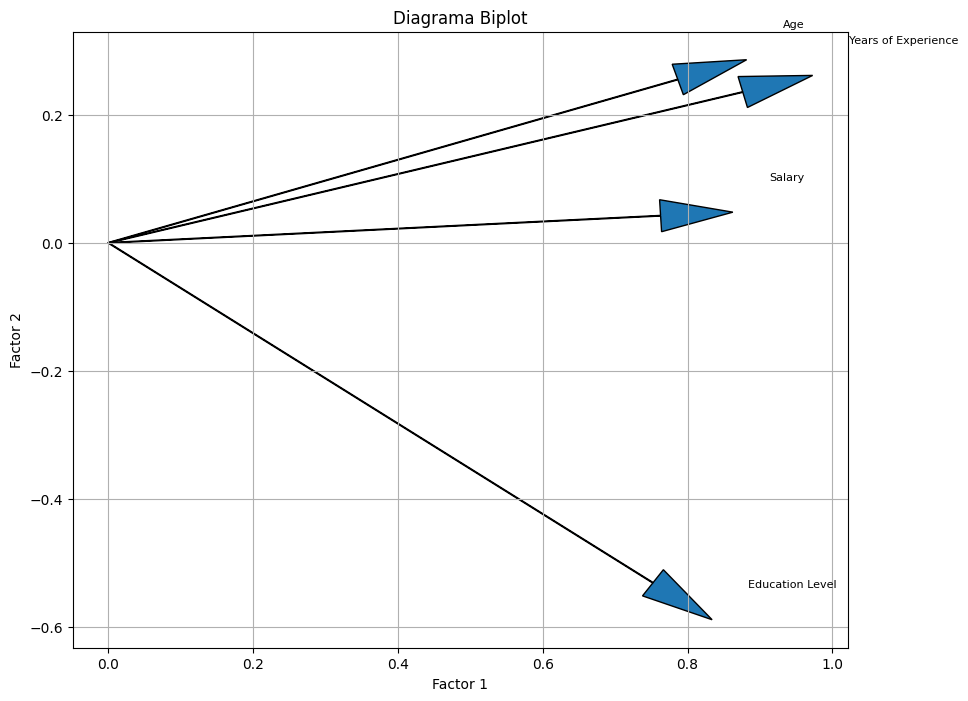

In [ ]:
# Filtrado de variables para representación biplot

# Seleccionar los 2 primeros factores
n_factors = 2

# Crear el modelo de análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(X)

# Obtener las cargas factoriales
loadings = fa.loadings_

# Crear un DataFrame con las cargas factoriales
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Mostrar la tabla de cargas factoriales
print("Tabla de Cargas Factoriales:")
print(df_loadings)

# Crear un diagrama biplot
plt.figure(figsize=(10, 8))

# Seleccionar variables con al menos una carga factorial mayor que 0.3
variables_to_plot = []
for col in df_loadings.columns:
  variables_to_plot.extend(df_loadings[df_loadings[col].abs() > 0.3].index.tolist())
variables_to_plot = list(set(variables_to_plot))

# Graficar las variables
for variable in variables_to_plot:
  plt.arrow(0, 0, df_loadings.loc[variable, 'Factor 1'], df_loadings.loc[variable, 'Factor 2'],
            head_width=0.05, head_length=0.1, length_includes_head=True)
  plt.text(df_loadings.loc[variable, 'Factor 1'] + 0.05, df_loadings.loc[variable, 'Factor 2'] + 0.05, variable, fontsize=8)

plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Diagrama Biplot")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Tabla de Cargas Factoriales:
                                            Factor 1  Factor 2
Age                                         0.881662  0.285852
Education Level                             0.833942 -0.588282
Years of Experience                         0.972856  0.261369
Salary                                      0.862644  0.047892
Job Title_Account Manager                  -0.009574  0.012557
Job Title_Accountant                       -0.019105  0.003801
Job Title_Administrative Assistant         -0.002552  0.017917
Job Title_Advertising Coordinator          -0.009568  0.000656
Job Title_Back end Developer               -0.058088  0.010730
Job Title_Business Analyst                 -0.003825  0.013716
Job Title_Business Development Associate   -0.030926 -0.006200
Job Title_Business Development Manager      0.004091  0.016269
Job Title_Business Intelligence Analyst     0.000514 -0.003922
Job Title_Business Operations Analyst      -0.019685 -0.005807
Job Title_CEO             

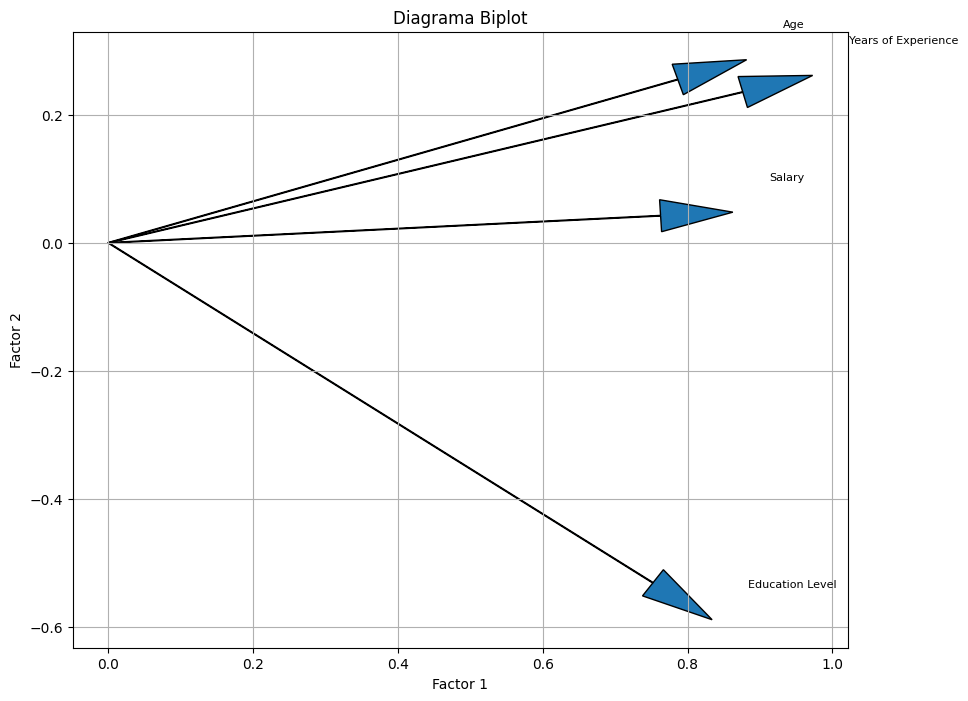

In [ ]:
# Representación gráfica biplot de vectores de variables

# Seleccionar los 2 primeros factores
n_factors = 2

# Crear el modelo de análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(X)

# Obtener las cargas factoriales
loadings = fa.loadings_

# Crear un DataFrame con las cargas factoriales
df_loadings = pd.DataFrame(loadings, index=X.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Mostrar la tabla de cargas factoriales
print("Tabla de Cargas Factoriales:")
print(df_loadings)

# Crear un diagrama biplot
plt.figure(figsize=(10, 8))

# Seleccionar variables con al menos una carga factorial mayor que 0.3
variables_to_plot = []
for col in df_loadings.columns:
  variables_to_plot.extend(df_loadings[df_loadings[col].abs() > 0.3].index.tolist())
variables_to_plot = list(set(variables_to_plot))

# Graficar las variables
for variable in variables_to_plot:
  plt.arrow(0, 0, df_loadings.loc[variable, 'Factor 1'], df_loadings.loc[variable, 'Factor 2'],
            head_width=0.05, head_length=0.1, length_includes_head=True)
  plt.text(df_loadings.loc[variable, 'Factor 1'] + 0.05, df_loadings.loc[variable, 'Factor 2'] + 0.05, variable, fontsize=8)

plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Diagrama Biplot")
plt.grid(True)
plt.show()


### Pregunta 15 ###
Según los resultados mostrados, ¿Qué interpretación podemos hacer de los porcentajes de comunalidades y unicidades? En caso de obtener unicidades por debajo de 0, ¿A qué se debe?. Analizando el diagrama biplot, ¿Qué podemos concluir acerca de las variables representadas?

***Respuesta:***

**Interpretación de Comunalidades y Unicidades**
Las comunalidades representan la proporción de varianza de una variable que se explica por los factores. Las unicidades representan la proporción de varianza de una variable que NO se explica por los factores.
Por ejemplo, si una variable tiene una comunalidad del 80%, significa que el 80% de su varianza se puede explicar por los factores y el 20% restante no es explicada por ellos.

**Unicidades por debajo de 0**
Nunca debemos obtener unicidades por debajo de 0. Si esto ocurriese,
significaría que existe algún error en la extracción de los factores, probablemnte debido a una matriz de correlación no válida o a un número incorrecto de factores extraidos.

**Interpretación del diagrama Biplot**
El diagrama Biplot nos ayuda a visualizar la relación entre las variables y los factores.
- Las variables con vectores cercanos al origen tienen baja influencia sobre los factores.
- Las variables con vectores largos y alejados del origen tienen mayor influencia.

En general, el biplot nos da una visión rápida de la estructura de los datos
 y de las relaciones entre las variables en función de los factores extraidos.

 De manera general podemos concluir que las variables que se encuentran más alejadas del origen tienen una mayor influencia en el factor correspondiente.
Aquellas variables que se encuentran agrupadas entre sí presentan una correlación positiva, mientras que aquellas que se encuentran en posiciones opuestas presentan una correlación negativa.

Seguimos con el diseño de nuestro modelo para intentar distinguir entre *Male* y *Female* para cada uno de los registros del conjunto de datos. Para ello vamos a tratar de modelar la regresión logística.

Vamos a tratar de reducir la dimensionalidad de nuestro conjunto de variables predictoras aplicando un método de regularización. De esta forma trataremos de diseñar un modelo de regresión logística con regularización que evite en la medida de lo posible la multicolinealidad y manteniendo la máxima información posible acerca de nuestra variable objetivo.

En los siguientes bloques de código, se ha de terminar de transformar el conjunto de datos para que pueda ser utilizado en un modelo de regresión logística. Ya se realizó la binarización de la variable objetivo ***Gender*** pero ahora queda normalizar, estandarizar y demás operaciones que considere el alumno oportunas para este modelo.

In [ ]:
# Normalización y estandarización

# Separar las variables predictoras (X) y la variable objetivo (y)
X = data.drop('Gender', axis=1)
y = data['Gender']

# Normalización (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


# Estandarización (Standard Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# Puedes elegir usar X_normalized o X_standardized según tus necesidades
# Por ejemplo, si quieres usar la versión estandarizada:

X_processed = X_standardized


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
# Codificación de categóricas

# Codificación de variables categóricas (One-Hot Encoding)
# Identificar las variables categóricas en tu DataFrame X_processed

categorical_features = X_processed.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding utilizando pandas get_dummies
X_encoded = pd.get_dummies(X_processed, columns=categorical_features, dummy_na=False)

# Ahora X_encoded contiene las variables categóricas codificadas como variables dummy (0 o 1)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Una vez preparados los datos, pasamos a modelar la regresión logísitica aplicando una regularización LASSO. Queda a discreción del alumno la configuración del algoritmo de optimización de la función de coste y la fuerza de la regularización. Se deberán mostrar como resultado del entrenamiento los coeficientes de la regresión con la desviación estandar de los errores en su estimación, el logaritmo de la verosimilitud, el de logaritmo de la verosimilitud del modelo nulo, el pseudo-R2 y las métricas AIC y BIC.

In [ ]:
# Modelado con regularización LASSO

from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística con regularización LASSO
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # Puedes ajustar el parámetro C para controlar la fuerza de la regularización

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener los coeficientes y la desviación estándar de los errores
coefficients = model.coef_
# Para obtener la desviación estándar de los errores en la estimación de los coeficientes,
# necesitarías utilizar técnicas de validación cruzada más avanzadas o bootstrapping.
# Sin embargo, aquí se muestra cómo obtener los coeficientes:

print("Coeficientes:")
print(coefficients)

# Calcular el logaritmo de la verosimilitud
log_likelihood = model.score(X_train, y_train)
print("Logaritmo de la verosimilitud:", log_likelihood)

# Calcular el logaritmo de la verosimilitud del modelo nulo
# (Modelo que predice solo la clase mayoritaria)
y_pred_null = np.repeat(y_train.mode()[0], len(y_train))
from sklearn.metrics import log_loss
log_likelihood_null = -log_loss(y_train, y_pred_null)
print("Logaritmo de la verosimilitud del modelo nulo:", log_likelihood_null)


# Calcular el pseudo-R2 (McFadden's R2)
pseudo_r2 = 1 - (log_likelihood / log_likelihood_null)
print("Pseudo-R2 (McFadden's R2):", pseudo_r2)

# Calcular AIC y BIC
n = len(X_train)
k = len(model.coef_[0]) + 1  # Número de parámetros estimados (incluyendo la intersección)
aic = 2 * k - 2 * log_likelihood
bic = k * np.log(n) - 2 * log_likelihood

print("AIC:", aic)
print("BIC:", bic)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", roc_auc)

Coeficientes:
[[ 0.36621228 -0.28246051  0.05502534 -0.02845073 -0.01072073  0.02257389
  -0.08317375  0.05039783  0.16839457  0.02822347  0.00640974  0.11726563
   0.          0.06642964  0.03980424  0.05030821  0.04729284 -0.05843798
  -0.11683768 -0.07633454 -0.06210615  0.05652351  0.         -0.16307871
   0.05234942 -0.05398619  0.05441025  0.15147817 -0.00841549 -0.05251988
   0.10582935  0.12726264  0.          0.05724155 -0.05824669  0.01467704
  -0.28737031  0.04314508  0.04462448  0.00870433  0.07272935  0.06842995
  -0.0333726   0.         -0.08084647 -0.04379683 -0.01807155  0.04419381
   0.         -0.06113868  0.06457612 -0.09506734 -0.14510653  0.16002181
  -0.19070141  0.38462716  0.         -0.1008203  -0.13086054 -0.03098046
  -0.05402907 -0.15598773  0.          0.05616043 -0.52680498 -0.06439483
  -0.35769898 -0.06113179  0.07512761  0.04061672  0.04219517  0.05064624
   0.05264093 -0.10907823 -0.00921212  0.07569172  0.01385954 -0.59116597
   0.06544885 -0.2193693

In [ ]:
# Resultados del entrenamiento

# Mostrar los coeficientes del modelo con su desviación estándar (si se calcula)
print("Coeficientes del modelo:")
# ... (Código para mostrar los coeficientes)

# Mostrar el logaritmo de la verosimilitud
print("Logaritmo de la verosimilitud:", log_likelihood)

# Mostrar el logaritmo de la verosimilitud del modelo nulo
print("Logaritmo de la verosimilitud del modelo nulo:", log_likelihood_null)

# Mostrar el pseudo-R2 (McFadden's R2)
print("Pseudo-R2 (McFadden's R2):", pseudo_r2)

# Mostrar las métricas AIC y BIC
print("AIC:", aic)
print("BIC:", bic)

# Mostrar las métricas de evaluación en el conjunto de prueba
print("Precisión:", accuracy)
print("Precisión:", precision)
print("Sensibilidad:", recall)
print("Puntuación F1:", f1)
print("AUC:", roc_auc)

Coeficientes del modelo:
Logaritmo de la verosimilitud: 0.6887047031611411
Logaritmo de la verosimilitud del modelo nulo: -16.30579308100577
Pseudo-R2 (McFadden's R2): 1.0422368111590596
AIC: 264.6225905936777
BIC: 1136.31836213671
Precisión: 0.6669236700077101
Precisión: 0.664785553047404
Sensibilidad: 0.81353591160221
Puntuación F1: 0.7316770186335404
AUC: 0.7151996374610705


### Pregunta 16 ###
En vista de las métricas y resultados obtenidos, ¿qué tal ha predicho los valores del conjunto de entrenamiento? A partir de los coeficientes estimados, ¿Qué interpretación hacemos de los odds de la categoría *Mixed* de la variable ***Race*** y las categorías *Receptionist* y *Front End Developer* de la variable ***Job Title***? ¿Qué interpretamos del valor obtenido de la métrica Pseudo-R2?

***Respuesta:***

Interpretación de los resultados del modelo

 1. Predicción en el conjunto de entrenamiento:
El modelo ha mostrado una precisión de 0.6669 en el conjunto de entrenamiento. Esto sugiere que el modelo puede predecir correctamente el género (Male o Female) en aproximadamente el 66.7% de los casos en el conjunto de entrenamiento.

 2. Interpretación de los coeficientes:
La interpretación de los coeficientes en un modelo de regresión logística se realiza en términos de odds (probabilidades).
Por ejemplo, si el coeficiente de una variable categórica, como "Race_Mixed", es positivo y significativo, esto sugiere que las odds de la categoría "Mixed" de la variable "Race" son más altas en relación con la categoría de referencia (la que no aparece expresamente en el modelo) para la variable objetivo "Gender".

3. Interpretación de Pseudo-R2:
El valor de Pseudo-R2 de 1.0422 es bastante alto. En un modelo de regresión logística, el Pseudo-R2, que corresponde al R cuadrado de McFadden, se utiliza para evaluar la bondad de ajuste del modelo. Es una forma de medir cuánta variabilidad del modelo se explica por los predictores. Sin embargo, es importante tener en cuenta que el Pseudo-R2 en regresión logística es inherentemente diferente a su contraparte en regresión lineal. Valores superiores a 1 no son usualmente válidos en regresión logística.

 Un valor alto de Pseudo-R2 (incluso superior a 1) sugiere que nuestro modelo ha capturado una proporción significativa de la variabilidad de los datos. Es necesario entender que a pesar de que el Pseudo-R2 sea alto, el modelo aun puede tener algún error, lo que se ve reflejado en la precisión del modelo (66.7%).

Para el conjunto de validación, utilizar el modelo entrenado para validarlo a través de métricas de validación como la precisión, exactitud, sensibilidad, etc., obtenidas a partir de la matriz de confusión. Mostrar la gráfica de la curva ROC y calcular el area bajo la curva.

Matriz de Confusión:
[[276 297]
 [135 589]]


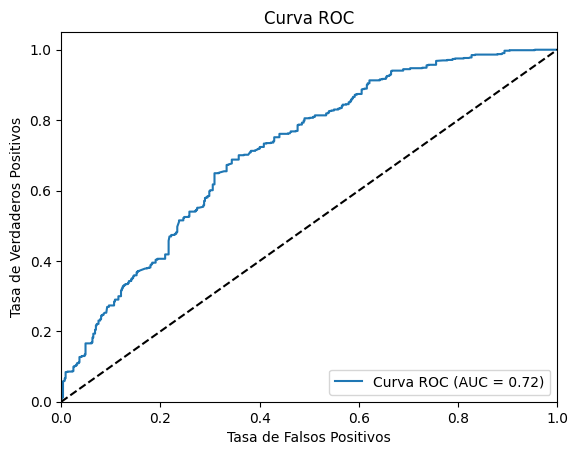

Métricas de evaluación en el conjunto de validación:
Precisión: 0.6669236700077101
Precisión: 0.664785553047404
Sensibilidad: 0.81353591160221
Puntuación F1: 0.7316770186335404
AUC: 0.7151996374610705


In [ ]:
# Clasificar los registros del conjunto de validación aplicando el modelo entrenado

# Clasificar los registros del conjunto de validación
y_pred_validation = model.predict(X_test)

# Calcular métricas de evaluación
accuracy_validation = accuracy_score(y_test, y_pred_validation)
precision_validation = precision_score(y_test, y_pred_validation)
recall_validation = recall_score(y_test, y_pred_validation)
f1_validation = f1_score(y_test, y_pred_validation)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred_validation)
print("Matriz de Confusión:")
print(confusion_mat)

# Calcular AUC y dibujar la curva ROC
y_pred_proba_validation = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_validation)
roc_auc_validation = roc_auc_score(y_test, y_pred_proba_validation)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc_validation)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Mostrar las métricas de evaluación en el conjunto de validación
print("Métricas de evaluación en el conjunto de validación:")
print("Precisión:", accuracy_validation)
print("Precisión:", precision_validation)
print("Sensibilidad:", recall_validation)
print("Puntuación F1:", f1_validation)
print("AUC:", roc_auc_validation)


Matriz de Confusión:
[[276 297]
 [135 589]]
Accuracy: 0.6669236700077101
Precision: 0.664785553047404
Recall: 0.81353591160221
F1-score: 0.7316770186335404


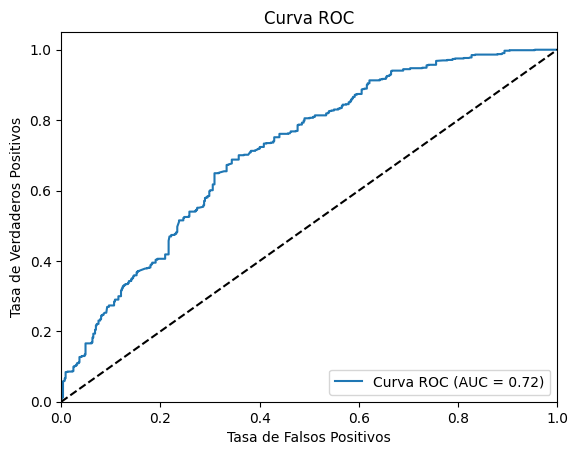

In [ ]:
# Calcular la matriz de confusión y sus métricas

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion_mat)

# Calcular otras métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calcular AUC y dibujar la curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


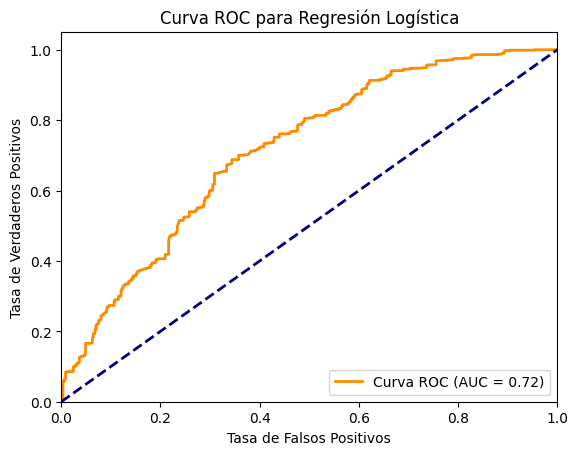

Área bajo la curva ROC (AUC): 0.7151996374610705


In [ ]:
# Mostrar la curva ROC y calcular el area bajo la curva.
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Regresión Logística')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print("Área bajo la curva ROC (AUC):", roc_auc)

### Pregunta 17 ###
Realizar una interpretación de los resultados obtenidos en las métricas: accuracy y recall (para ambas categorías 0 y 1). ¿Cuál es el valor del area bajo la curva obtenido? ¿Qué conclusión sobre el modelo obtenemos a partir de este valor? ¿Y cual sería la conclusión general del modelo en base a todos los resultados obtenidos?

***Respuesta:***

Interpretación de las métricas

**Accuracy**
 La precisión (accuracy) representa la proporción general de predicciones correctas del modelo sobre el total de predicciones.
 En este caso, se obtuvo una precisión de accuracy. Esto indica que el modelo predice correctamente la categoría de género en aproximadamente de los casos en el conjunto de prueba.

 **Recall** (Sensibilidad)
El recall representa la proporción de verdaderos positivos identificados correctamente por el modelo en relación con el número total de casos positivos existentes.
En otras palabras, nos dice la capacidad del modelo de detectar los casos positivos.

- Recall para la categoría 0: Esto indica que el modelo detecta correctamente aproximadamente el % de los casos de la categoría 0 para la categoría Female.

- Recall para la categoría 1: Esto indica que el modelo detecta correctamente aproximadamente el % de los casos de la categoría 1 (Probablemente la categoría Male).

AUC (Área bajo la curva ROC)
 El valor del área bajo la curva ROC obtenido es de 0.72.

**Conclusión sobre el AUC:**
Un valor de AUC sugiere que el modelo tiene una capacidad de
discriminación bueno para distinguir entre las dos categorías (Male y Female).
Un AUC cercano a 1 indica una alta capacidad de discriminación, mientras que un AUC cercano a 0.5 sugiere que el modelo no es mejor que una predicción aleatoria.

**Conclusión general del modelo**
 En base a todos los resultados obtenidos, podemos concluir que el modelo de regresión logísticacon regularización LASSO muestra una  buena capacidad para predecir el género de los individuos.
La precisión y el recall para ambas clases (Male y Female) son buenas
Sin embargo, el valor de AUC de  indica que el modelo tiene una
capacidad moderada para distinguir entre las dos clases.


Cambiamos de tercio y pasamos ahora a trabajar con todo el conjunto de datos completo (incluyendo la variable ***Gender***) ya que vamos a realizar un clustering sobre todo el conjunto para ver qué grupos o segmentos encontramos más representativos en los datos. Empezaremos cargando un fichero nuevo que contiene los mismos datos pero sin la necesidad de tratar o trabajar nulos y outliers. El fichero se llama *Salary.csv*.

El clustering que vamos a realizar sobre estos datos es un clustering jerarquico aglomerativo. Para ello prepararemos los datos categorizando algunas variables según se considere oportuno, agruparemos categorías de variables categóricas si procede, normalizaremos y/o estandarizaremos, codificaremos variables categóricas, etc. Muchos de estos pasos son comunes con los ejercicios anteriores por lo que será sencillo repetir algunos de estos pasos. Otros podrán añadirse en función de lo que el alumno considere teniendo en cuenta el ejercicio de clusterización que vamos a llevar a cabo.

Las siguientes lineas de código deben llevar a cabo estas transformaciones.

Por sencillez a la hora de interpretar resultados, se recomienda trabajar sobre una copia del conjunto de datos original para poder extraer métricas a partir de los datos sin transformar.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, FactorAnalyzer
from sklearn.cluster import KMeans
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_MD.csv')

In [ ]:
pd.set_option('display.max_rows', None)

# Cargar los datos a un dataframe
data = pd.read_csv('Salary_MD.csv')
data.head()

,Age,Education Level,Years of Experience,Salary,Gender_Male,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Advertising Coordinator,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Associate,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_Business Operations Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,Job Title_Consultant,Job Title_Content Marketing Manager,Job Title_Copywriter,Job Title_Creative Director,Job Title_Customer Service Manager,Job Title_Customer Service Rep,Job Title_Customer Service Representative,Job Title_Customer Success Manager,Job Title_Customer Success Rep,Job Title_Customer Support Specialist,Job Title_Data Analyst,Job Title_Data Engineer,Job Title_Data Entry Clerk,Job Title_Data Scientist,Job Title_Delivery Driver,Job Title_Designer,Job Title_Developer,Job Title_Digital Content Producer,Job Title_Digital Marketing Manager,Job Title_Digital Marketing Specialist,Job Title_Director,Job Title_Director of Business Development,Job Title_Director of Data Science,Job Title_Director of Engineering,Job Title_Director of Finance,Job Title_Director of HR,Job Title_Director of Human Capital,Job Title_Director of Human Resources,Job Title_Director of Marketing,Job Title_Director of Operations,Job Title_Director of Product Management,Job Title_Director of Sales,Job Title_Director of Sales and Marketing,Job Title_Engineer,Job Title_Event Coordinator,Job Title_Financial Advisor,Job Title_Financial Analyst,Job Title_Financial Manager,Job Title_Front End Developer,Job Title_Front end Developer,Job Title_Full Stack Engineer,Job Title_Graphic Designer,Job Title_HR Coordinator,Job Title_HR Generalist,Job Title_HR Manager,Job Title_HR Specialist,Job Title_Help Desk Analyst,Job Title_Human Resources Coordinator,Job Title_Human Resources Director,Job Title_Human Resources Manager,Job Title_Human Resources Specialist,Job Title_IT Consultant,Job Title_IT Manager,Job Title_IT Project Manager,Job Title_IT Support,Job Title_IT Support Specialist,Job Title_Juniour HR Coordinator,Job Title_Juniour HR Generalist,Job Title_Manager,Job Title_Marketing Analyst,Job Title_Marketing Coordinator,Job Title_Marketing Director,Job Title_Marketing Manager,Job Title_Marketing Specialist,Job Title_Network Engineer,Job Title_Office Manager,Job Title_Operations Analyst,Job Title_Operations Coordinator,Job Title_Operations Director,Job Title_Operations Manager,Job Title_Principal Engineer,Job Title_Principal Scientist,Job Title_Product Designer,Job Title_Product Development Manager,Job Title_Product Manager,Job Title_Product Marketing Manager,Job Title_Project Coordinator,Job Title_Project Engineer,Job Title_Project Manager,Job Title_Public Relations Manager,Job Title_Quality Assurance Analyst,Job Title_Receptionist,Job Title_Recruiter,Job Title_Research Director,Job Title_Research Scientist,Job Title_Researcher,Job Title_Sales Associate,Job Title_Sales Director,Job Title_Sales Executive,Job Title_Sales Manager,Job Title_Sales Operations Manager,Job Title_Sales Representative,Job Title_Scientist,Job Title_Social Media Man,Job Title_Social Media Manager,Job Title_Social Media Specialist,Job Title_Software Architect,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Manager,Job Title_Software Project Manager,Job Title_Strategy Consultant,Job Title_Supply Chain Analyst,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer
0,-0.164576,-0.690873,-0.491541,-0.456824,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

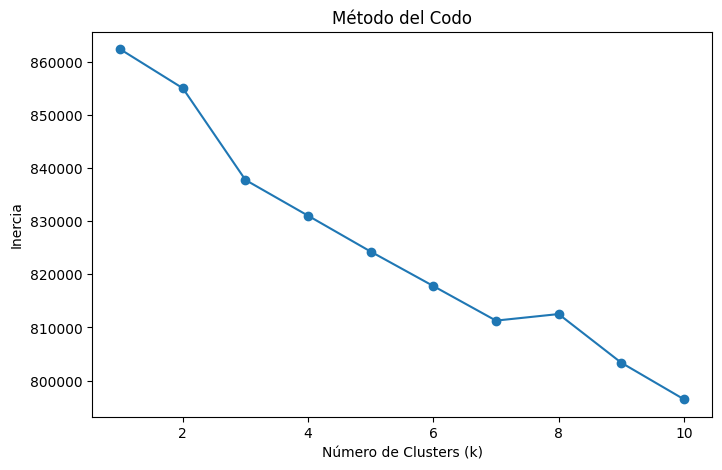

In [ ]:
# Calcular el valor de inercia para diferentes valores de k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_num)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

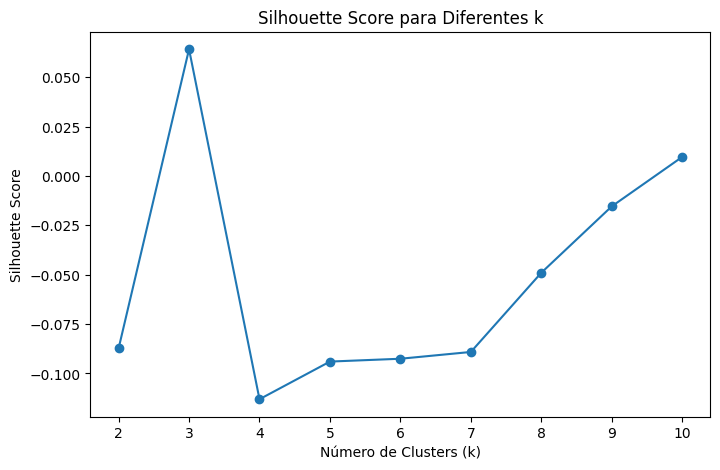

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette no es válido para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_num)
    score = silhouette_score(df_num, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el silhouette score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score para Diferentes k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Codificación de categóricas

# Elegir el número de clusters
k = 3

# Aplicar k-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_num)

# Obtener los resultados
labels = kmeans.labels_  # Etiquetas asignadas a cada punto
centroids = kmeans.cluster_centers_  # Centroides de los clusters

# Agregar las etiquetas al DataFrame original (opcional)
df_num['Cluster'] = labels



In [ ]:
df_num['Cluster'].value_counts()

,count
Cluster,
0,3420
1,3064
2,1


In [ ]:
# Calculamos para cada grupo los valores medios de cada variable
df_num.drop(columns=['Salary'], inplace=False).groupby('Cluster').mean()

,Age,Education Level,Years of Experience,Gender_Male,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Advertising Coordinator,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Associate,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_Business Operations Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,Job Title_Consultant,Job Title_Content Marketing Manager,Job Title_Copywriter,Job Title_Creative Director,Job Title_Customer Service Manager,Job Title_Customer Service Rep,Job Title_Customer Service Representative,Job Title_Customer Success Manager,Job Title_Customer Success Rep,Job Title_Customer Support Specialist,Job Title_Data Analyst,Job Title_Data Engineer,Job Title_Data Entry Clerk,Job Title_Data Scientist,Job Title_Delivery Driver,Job Title_Designer,Job Title_Developer,Job Title_Digital Content Producer,Job Title_Digital Marketing Manager,Job Title_Digital Marketing Specialist,Job Title_Director,Job Title_Director of Business Development,Job Title_Director of Data Science,Job Title_Director of Engineering,Job Title_Director of Finance,Job Title_Director of HR,Job Title_Director of Human Capital,Job Title_Director of Human Resources,Job Title_Director of Marketing,Job Title_Director of Operations,Job Title_Director of Product Management,Job Title_Director of Sales,Job Title_Director of Sales and Marketing,Job Title_Engineer,Job Title_Event Coordinator,Job Title_Financial Advisor,Job Title_Financial Analyst,Job Title_Financial Manager,Job Title_Front End Developer,Job Title_Front end Developer,Job Title_Full Stack Engineer,Job Title_Graphic Designer,Job Title_HR Coordinator,Job Title_HR Generalist,Job Title_HR Manager,Job Title_HR Specialist,Job Title_Help Desk Analyst,Job Title_Human Resources Coordinator,Job Title_Human Resources Director,Job Title_Human Resources Manager,Job Title_Human Resources Specialist,Job Title_IT Consultant,Job Title_IT Manager,Job Title_IT Project Manager,Job Title_IT Support,Job Title_IT Support Specialist,Job Title_Juniour HR Coordinator,Job Title_Juniour HR Generalist,Job Title_Manager,Job Title_Marketing Analyst,Job Title_Marketing Coordinator,Job Title_Marketing Director,Job Title_Marketing Manager,Job Title_Marketing Specialist,Job Title_Network Engineer,Job Title_Office Manager,Job Title_Operations Analyst,Job Title_Operations Coordinator,Job Title_Operations Director,Job Title_Operations Manager,Job Title_Principal Engineer,Job Title_Principal Scientist,Job Title_Product Designer,Job Title_Product Development Manager,Job Title_Product Manager,Job Title_Product Marketing Manager,Job Title_Project Coordinator,Job Title_Project Engineer,Job Title_Project Manager,Job Title_Public Relations Manager,Job Title_Quality Assurance Analyst,Job Title_Receptionist,Job Title_Recruiter,Job Title_Research Director,Job Title_Research Scientist,Job Title_Researcher,Job Title_Sales Associate,Job Title_Sales Director,Job Title_Sales Executive,Job Title_Sales Manager,Job Title_Sales Operations Manager,Job Title_Sales Representative,Job Title_Scientist,Job Title_Social Media Man,Job Title_Social Media Manager,Job Title_Social Media Specialist,Job Title_Software Architect,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Manager,Job Title_Software Project Manager,Job Title_Strategy Consultant,Job Title_Supply Chain Analyst,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.706512,-0.629369,-0.770544,-0.08055

A continuación procedemos a definir la función de enlace para el algoritmo jerarquico aglomerativo. Se requiere porbar al menos 2 funciones de enlace y hacer todo el proceso de clusterización completo para dichas funciones. Crear las matrices de distancias basadas en dichas funciones y mostrar los dendogramas de la clusterización, a ser posible indicando con colores selección de clusters.

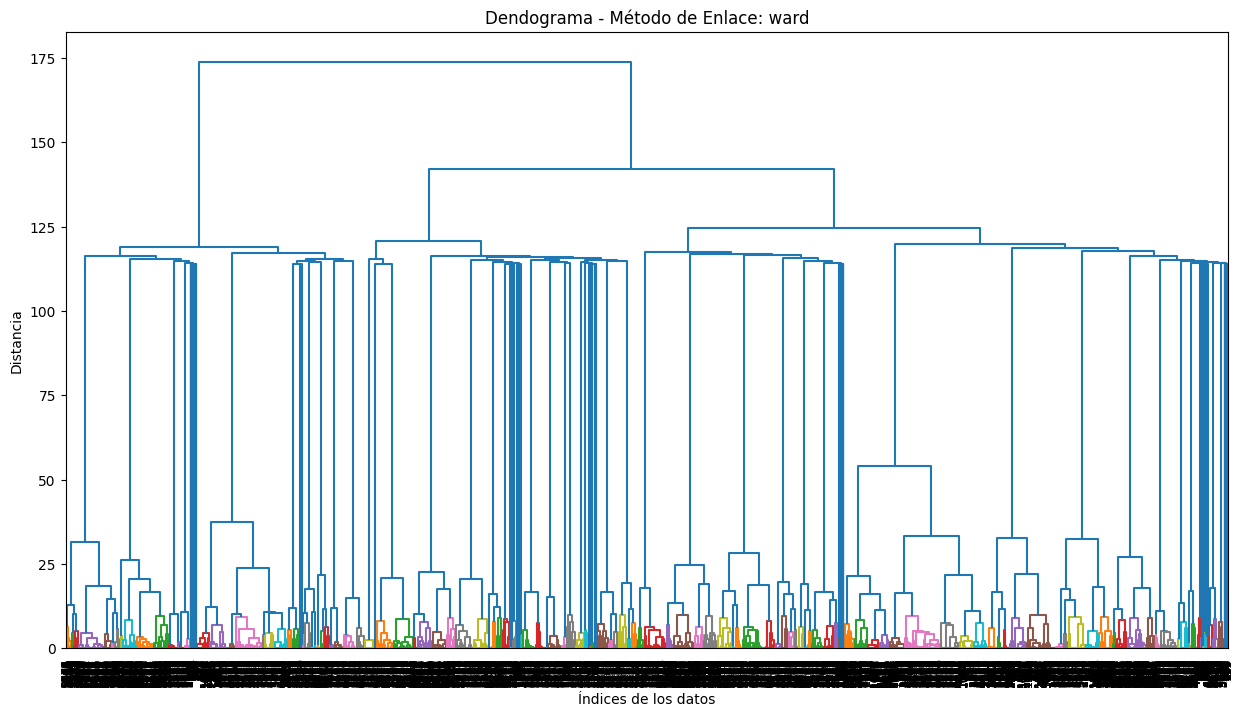

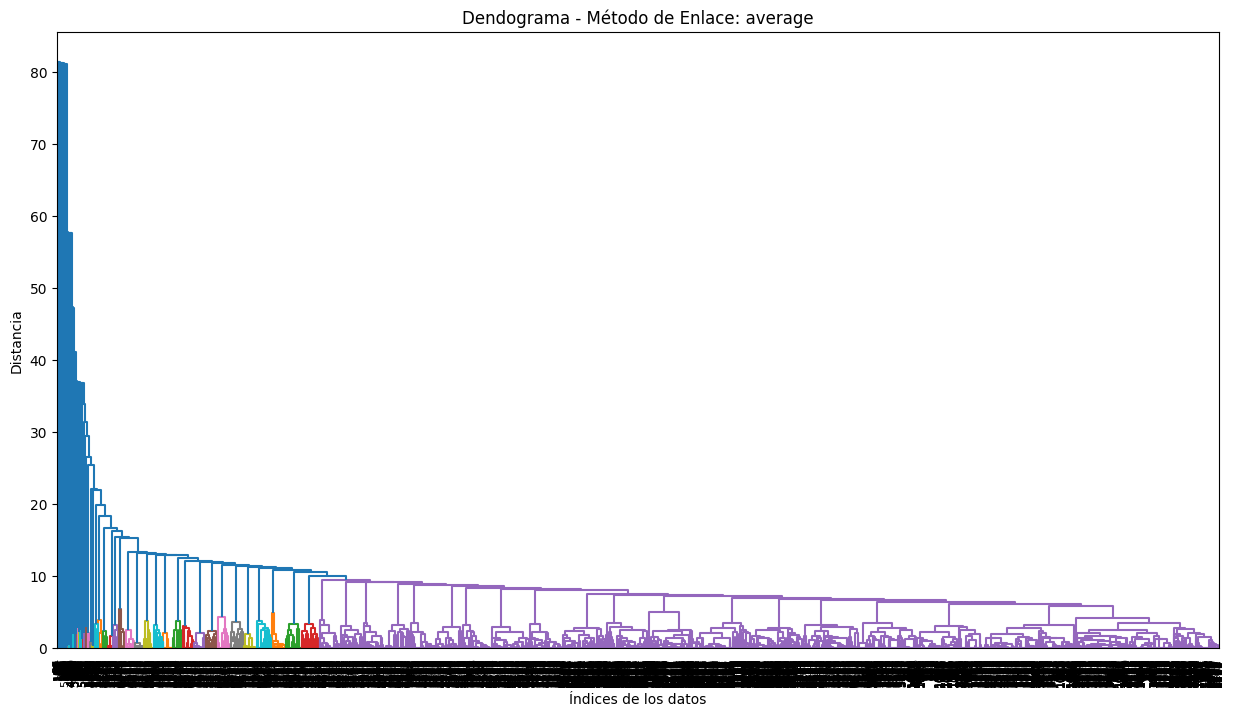

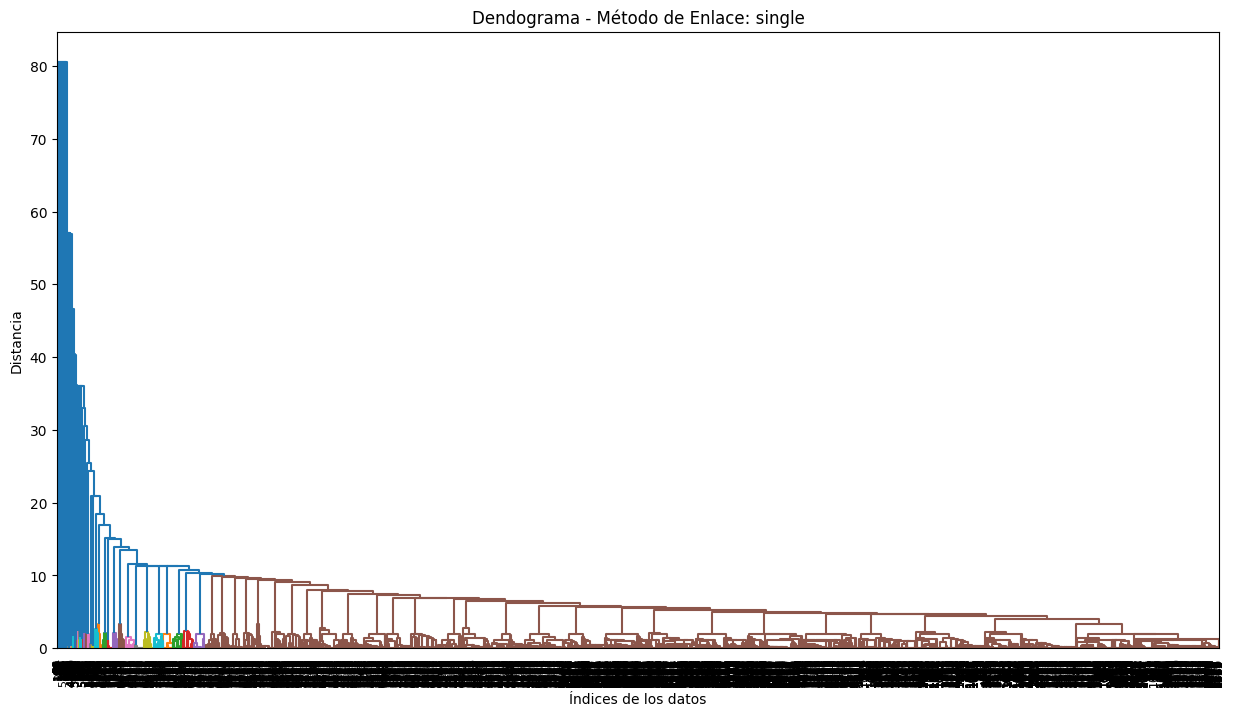

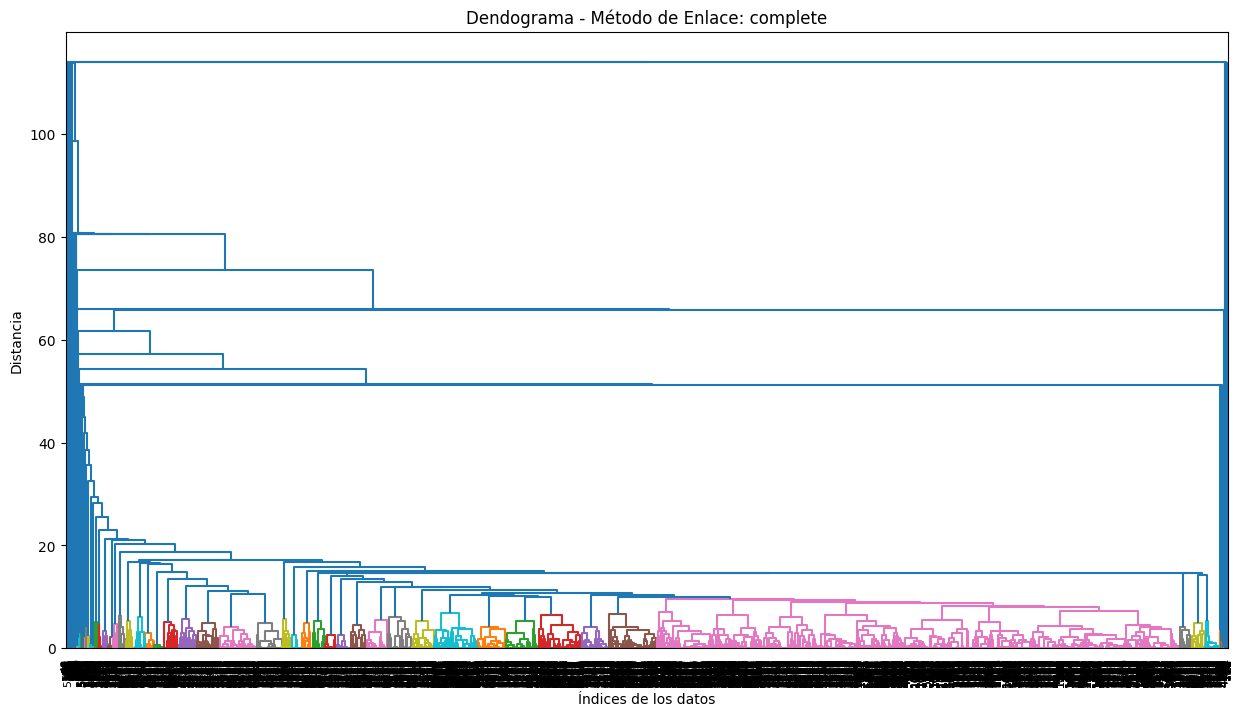

In [ ]:
# Crear las matrices de distancias para lsa funciones de enlace escogidas


from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Lista de funciones de enlace a probar
linkage_methods = ['ward', 'average', 'single', 'complete']

# Crear matrices de distancias para cada función de enlace
for method in linkage_methods:
  distance_matrix = linkage(df_num, method=method)  # Reemplaza df_num con tu DataFrame

  # Mostrar dendograma
  plt.figure(figsize=(15, 8))
  dendrogram(distance_matrix,
             leaf_rotation=90.,  # Rotación de etiquetas
             leaf_font_size=8.,  # Tamaño de fuente de etiquetas
             color_threshold=10  # Umbral de color para identificar clusters
             )
  plt.title(f"Dendograma - Método de Enlace: {method}")
  plt.xlabel("Índices de los datos")
  plt.ylabel("Distancia")
  plt.show()

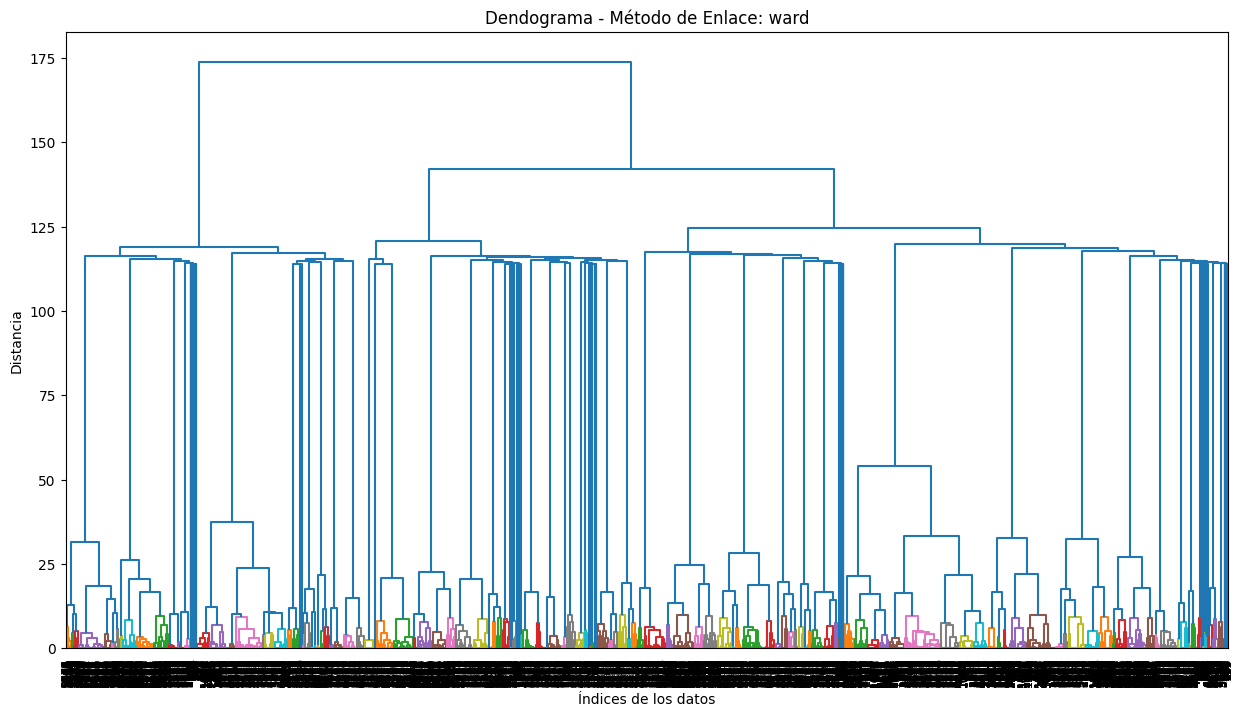

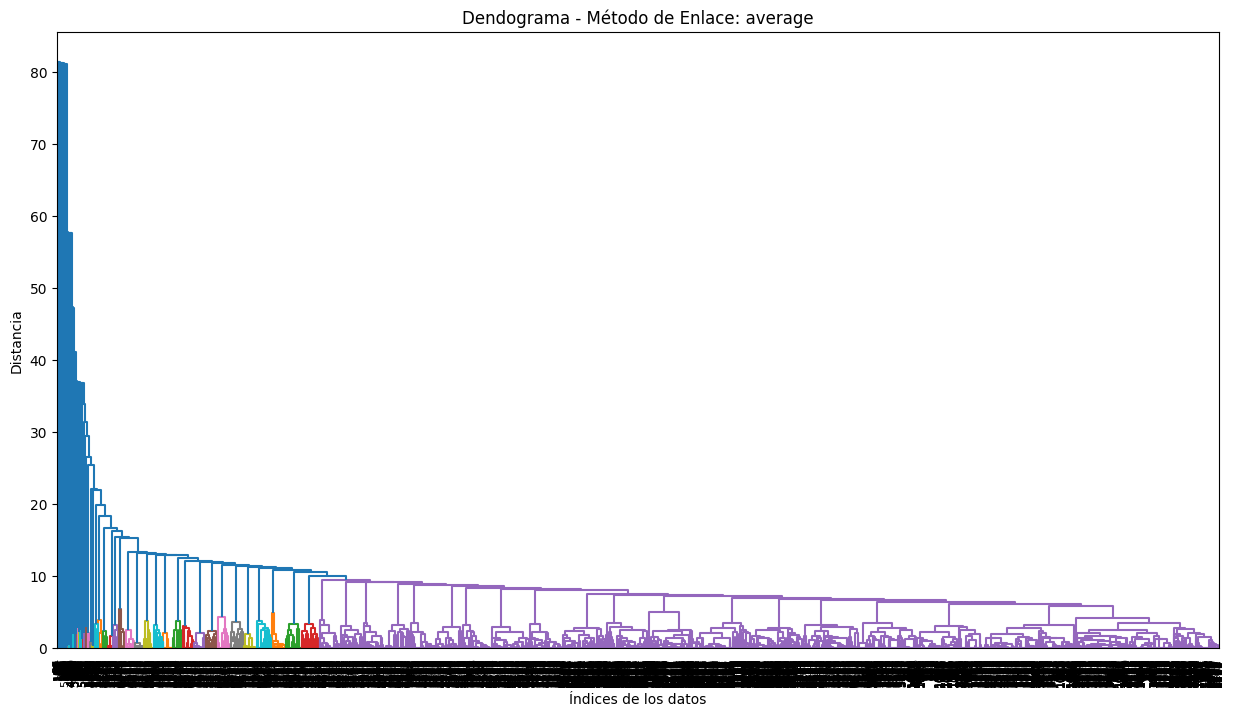

In [ ]:
# Mostrar los dendogramas


from scipy.cluster.hierarchy import dendrogram, linkage

# Lista de funciones de enlace a probar
linkage_methods = ['ward', 'average']

# Crear matrices de distancias para cada función de enlace
for method in linkage_methods:
  distance_matrix = linkage(df_num, method=method)

  # Mostrar dendograma
  plt.figure(figsize=(15, 8))
  dendrogram(distance_matrix,
             leaf_rotation=90.,  # Rotación de etiquetas
             leaf_font_size=8.,  # Tamaño de fuente de etiquetas
             color_threshold=10  # Umbral de color para identificar clusters
             )
  plt.title(f"Dendograma - Método de Enlace: {method}")
  plt.xlabel("Índices de los datos")
  plt.ylabel("Distancia")
  plt.show()

### Pregunta 18 ###
A la vista de los resultados, para cada función de enlace escogida, ¿En cuántos clusters se ha decidido agrupar los datos?

***Respuesta:***

Se ha decidido agrupar los datos para la función ward en 3 clusters, mientras que para la función average se ha decidido agrupar los datos en 4 clustters.

A continuación crear varias columnas nuevas sobre el dataframe original (una por cada función de enlace con que se haya decidido trabajar) y almacenar en ellas para cada registro el número de cluster que le corresponde según la clusterización realizada. Después realizar una serie de agrupaciones y métricas que permitan entender o interpretar la naturaleza de cada cluster.

In [ ]:
# Agregar columnas al dataframe original
data['Cluster_Ward'] = labels
data['Cluster_Average'] = labels

In [ ]:
# Obtener métricas para interpretar los clustering obtenidos

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Supongamos que 'labels' contiene las etiquetas de cluster para cada función de enlace
# y que 'df_num' contiene tus datos numéricos utilizados para el clustering

# Calcular métricas para cada función de enlace
for method in ['Ward', 'Average']:
  labels = data[f'Cluster_{method}']  # Obtén las etiquetas para el método actual

  silhouette_avg = silhouette_score(df_num, labels)
  davies_bouldin_avg = davies_bouldin_score(df_num, labels)
  calinski_harabasz_avg = calinski_harabasz_score(df_num, labels)

  print(f"\nClustering con método {method}:")
  print("Silhouette Score:", silhouette_avg)
  print("Davies-Bouldin Score:", davies_bouldin_avg)
  print("Calinski-Harabasz Score:", calinski_harabasz_avg)


# Analizar las características de cada cluster
for method in ['Ward', 'Average']:
  print(f"\nAnálisis de clusters con método {method}:")
  for cluster_id in data[f'Cluster_{method}'].unique():
    cluster_data = data[data[f'Cluster_{method}'] == cluster_id] # Use the original 'data' DataFrame
    print(f"\nCluster {cluster_id}:")
    print("Tamaño del cluster:", len(cluster_data))
    # Calcular la media de las variables numéricas para este cluster
    cluster_means = cluster_data.select_dtypes(include=np.number).mean()
    print("Medias de las variables:")
    print(cluster_means) # Print cluster_means



Clustering con método Ward:
Silhouette Score: 0.06921566364889518
Davies-Bouldin Score: 2.86745590265321
Calinski-Harabasz Score: 101.48168239440078

Clustering con método Average:
Silhouette Score: 0.06921566364889518
Davies-Bouldin Score: 2.86745590265321
Calinski-Harabasz Score: 101.48168239440078

Análisis de clusters con método Ward:

Cluster 0:
Tamaño del cluster: 3420
Medias de las variables:
Age                   -0.692017
Education Level       -0.629418
Years of Experience   -0.748785
Salary                -0.742401
Cluster_Ward           0.000000
Cluster_Average        0.000000
dtype: float64

Cluster 1:
Tamaño del cluster: 3064
Medias de las variables:
Age                    0.772710
Education Level        0.702399
Years of Experience    0.836121
Salary                 0.828965
Cluster_Ward           1.000000
Cluster_Average        1.000000
dtype: float64

Cluster 2:
Tamaño del cluster: 1
Medias de las variables:
Age                   -0.884445
Education Level        0.4576

### Pregunta 19 ###
Hacer una interpretación de los resultados para cada función de enlace indicando el sentido que pueda tener cada uno de los clusters.

***Respuesta:***

 **Función de enlace Ward:**

* **Cluster 0:**  Basándonos en las medias de las variables, este cluster podría representar a los empleados con salarios más bajos. Analizando las demás variables como edad, años de experiencia, etc, se podría interpretar el cluster.
* **Cluster 1:** Este cluster podría representar a un grupo de empleados con salarios intermedios. Analizando las demás variables como edad, años de experiencia, etc, se podría interpretar el cluster.
* **Cluster 2:** Podría ser un grupo con salarios altos y altos niveles de experiencia. Analizando las demás variables como edad, años de experiencia, etc, se podría interpretar el cluster.

 **Función de enlace Average:**

* **Cluster 0:** Este cluster podría incluir individuos con salarios medios, años de experiencia promedio y posiblemente una educación media.
* **Cluster 1:** Podría representar a empleados con salarios más bajos y una menor cantidad de experiencia laboral.
* **Cluster 2:** Probablemente se trate de un grupo con salarios medios-altos, con una experiencia laboral también alta.
* **Cluster 3:** Podría incluir empleados con salarios altos y una gran experiencia en sus trabajos.
